In [1]:
import sys
sys.path.append("../../")

In [2]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from botorch.utils.sampling import draw_sobol_samples
from botorch.utils.multi_objective.pareto import is_non_dominated
from botorch.test_functions.multi_objective import GMM, BraninCurrin
from botorch.utils.multi_objective.box_decompositions.dominated import DominatedPartitioning
from botorch.utils.multi_objective.box_decompositions.non_dominated import FastNondominatedPartitioning


tkwargs = {
    "dtype": torch.double,
    "device": torch.device("cpu"),
}
SEED = 42
# Setting seed for reproducibility
random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

In [3]:
# define problem
# problem = BraninCurrin(negate=True).to(**tkwargs)
problem = GMM(negate=True).to(**tkwargs)
problem.ref_point = torch.tensor([0., 0.], **tkwargs)

## Problem

The approximated pareto set and pareto front is shown in the following figure.

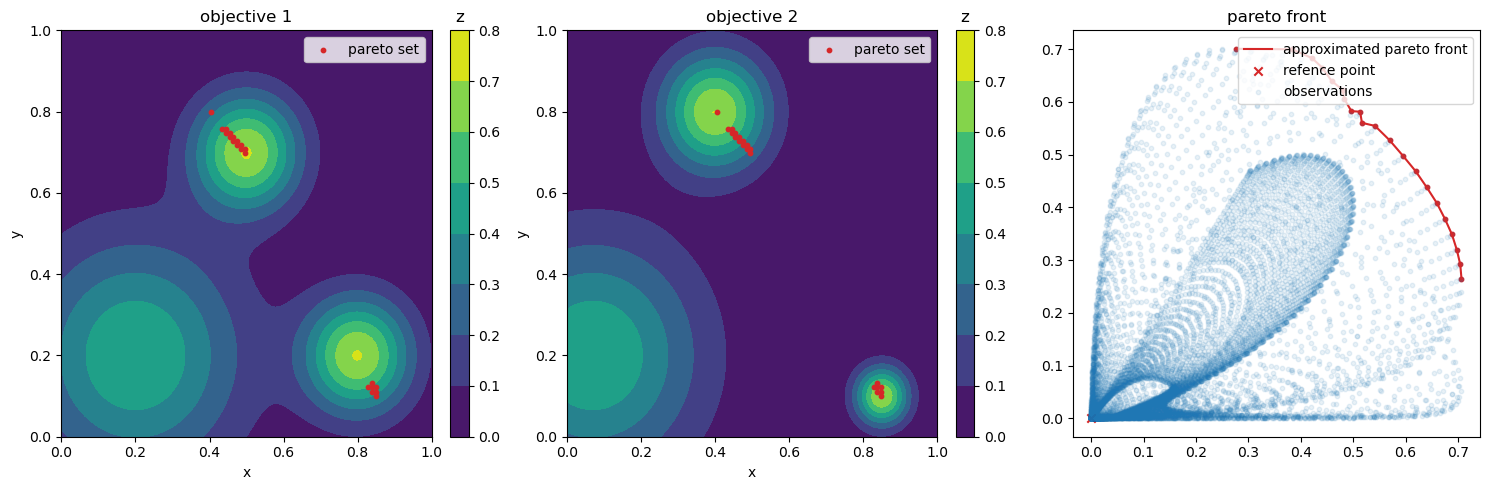

In [4]:
from plot_utils import plot_objective

plot_objective(problem, num_samples=100)

In [5]:
def generate_initial_data(problem, n=6):
    # generate training data
    train_x = draw_sobol_samples(bounds=problem.bounds, n=n, q=1).squeeze(1)
    train_obj = problem(train_x)
    return train_x, train_obj

In [6]:
init_x, init_y = generate_initial_data(problem, n=6)

## Generate data

In [7]:
from optimizers.mbore.mbore_mdre_ei import MBORE_MDRE_EI

In [8]:
def plot_input_space(xx, yy, x_obs, preds, fig, ax, title=None):
    div = make_axes_locatable(ax)
    cax = div.append_axes('right', '5%', '5%')

    # plot functions
    countourset = ax.contourf(
        xx,
        yy,
        preds.reshape(xx.shape),
    )
    ax.scatter(*x_obs.t(), alpha=0.3, s=10, color='tab:red')

    cax.grid(False)  # just to remove the warning
    clb = fig.colorbar(countourset, cax=cax)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)
    clb.ax.set_title('z')


def plot_pareto_space(y_obs, pareto, l, u_nbd, ax, title='pareto'):
    ax.scatter(*y_obs[~pareto].t(), s=10, alpha=0.3)
    ax.scatter(*l.t(), s=10, color='tab:red', label="pareto")
    ax.plot(*l.t(), color='tab:red')
    # ax.scatter(*u_nbd.t(), s=10, label="non dominated", color='tab:purple')
    ax.scatter(*problem.ref_point.t(), s=10, color='k', label="ref point")

    ax.set_xlabel('y1')
    ax.set_ylabel('y2')
    ax.set_title(title)
    ax.legend()


def plot_pareto_box(tau, boxes, ax):
    ax.scatter(*tau.t(), label=r"$\mathbf{\tau}$")
    pc = PatchCollection(boxes, cmap='tab10', alpha=.3)
    pc.set_array(torch.arange(0, len(boxes)))
    ax.add_collection(pc)
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    ax.axvspan(x_lim[0], tau[0], alpha=0.1, color='tab:gray')
    ax.axhspan(y_lim[0], tau[1], alpha=0.1, color='tab:gray')
    ax.set_xlim(*x_lim)
    ax.set_ylim(*y_lim)

In [9]:
x_obs = init_x
y_obs = init_y

num_obj = problem.num_objectives
# only plot the first two dimensions
xx, yy = np.meshgrid(
    np.linspace(
        *problem.bounds.t()[0], 100
    ),
    np.linspace(
        *problem.bounds.t()[1], 100
    ),
)
x_cands = np.vstack((xx.flatten(), yy.flatten())).T
x_cands = torch.from_numpy(x_cands).to(**tkwargs)
y_cands = problem(x_cands).reshape(100, 100, num_obj)
xx_obj, yy_obj = y_cands[:, :, 0], y_cands[:, :, 1]

2024-05-07 10:30:21,788 | MBORE_MDRE


Iteration 0


2024-05-07 10:30:22,857 | Model fitting takes 1.06s
2024-05-07 10:30:22,861 | Optimizing the acquisition function takes 0.00s


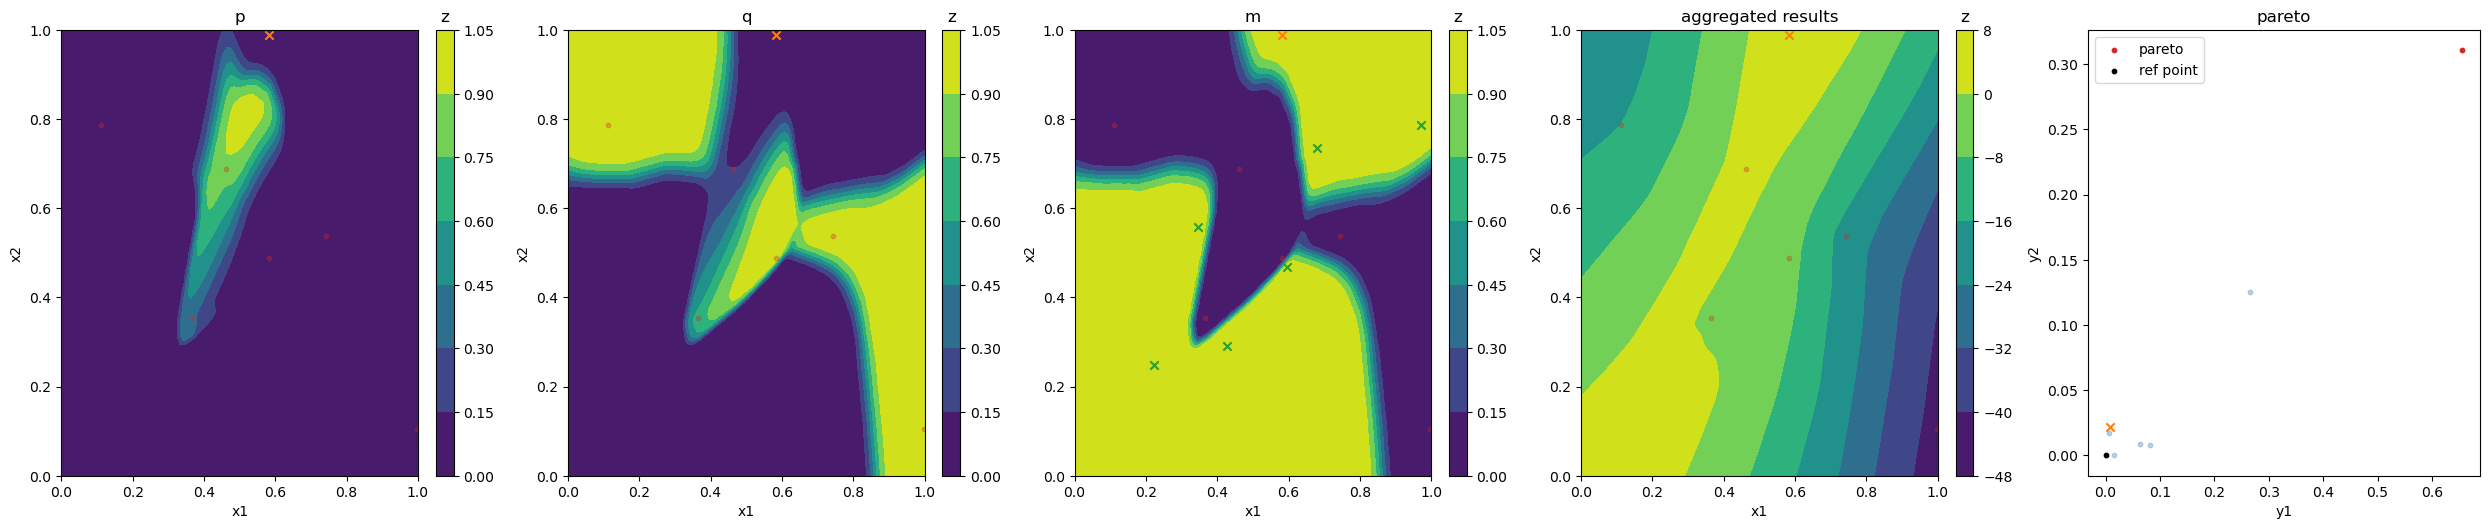

Iteration 1


2024-05-07 10:30:24,386 | Model fitting takes 0.66s
2024-05-07 10:30:24,388 | Optimizing the acquisition function takes 0.00s


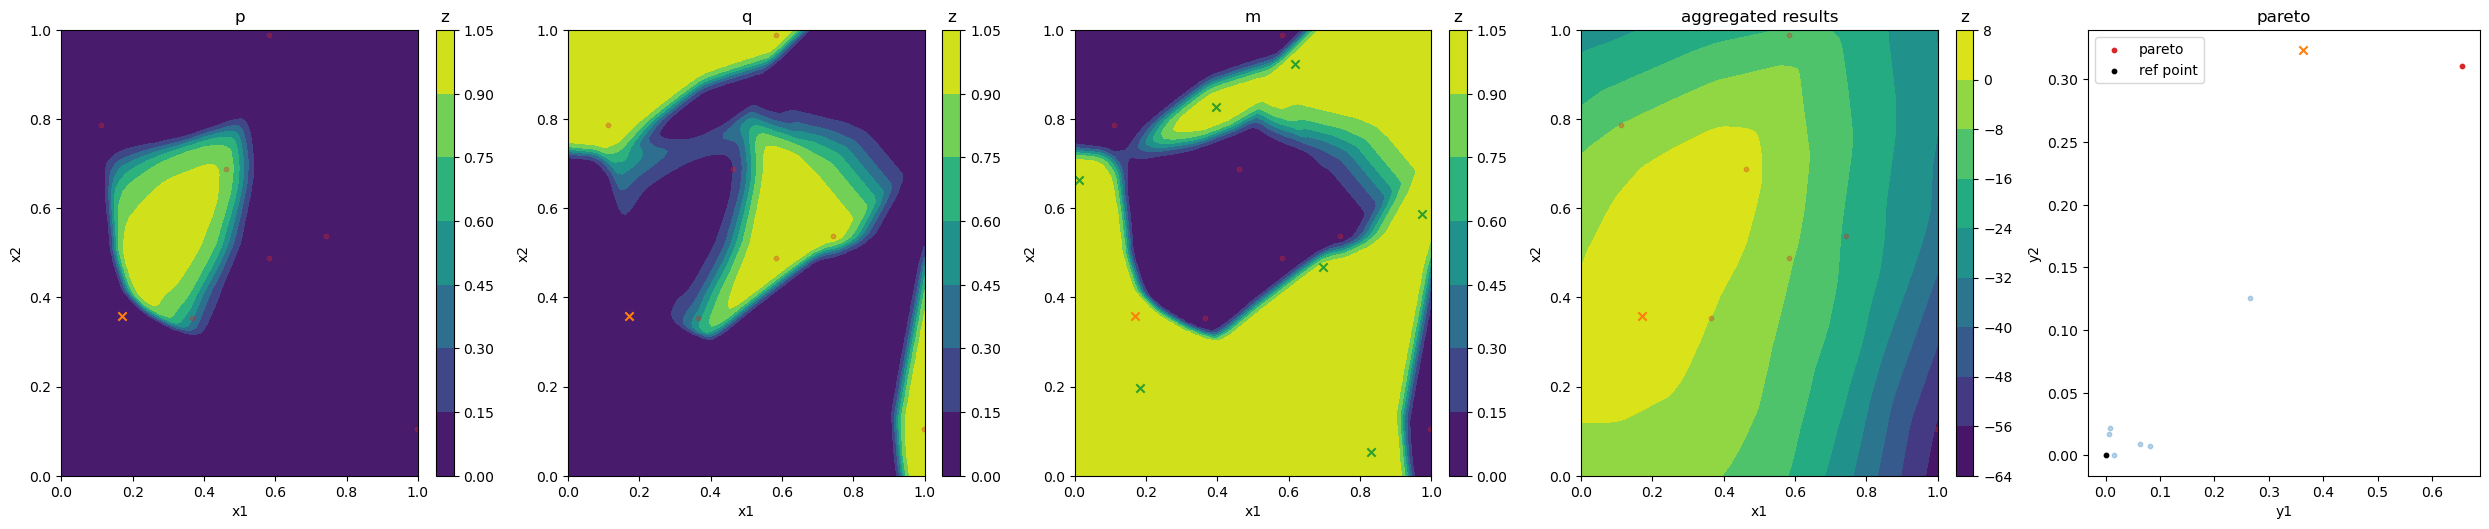

Iteration 2


2024-05-07 10:30:26,069 | Model fitting takes 0.67s
2024-05-07 10:30:26,072 | Optimizing the acquisition function takes 0.00s


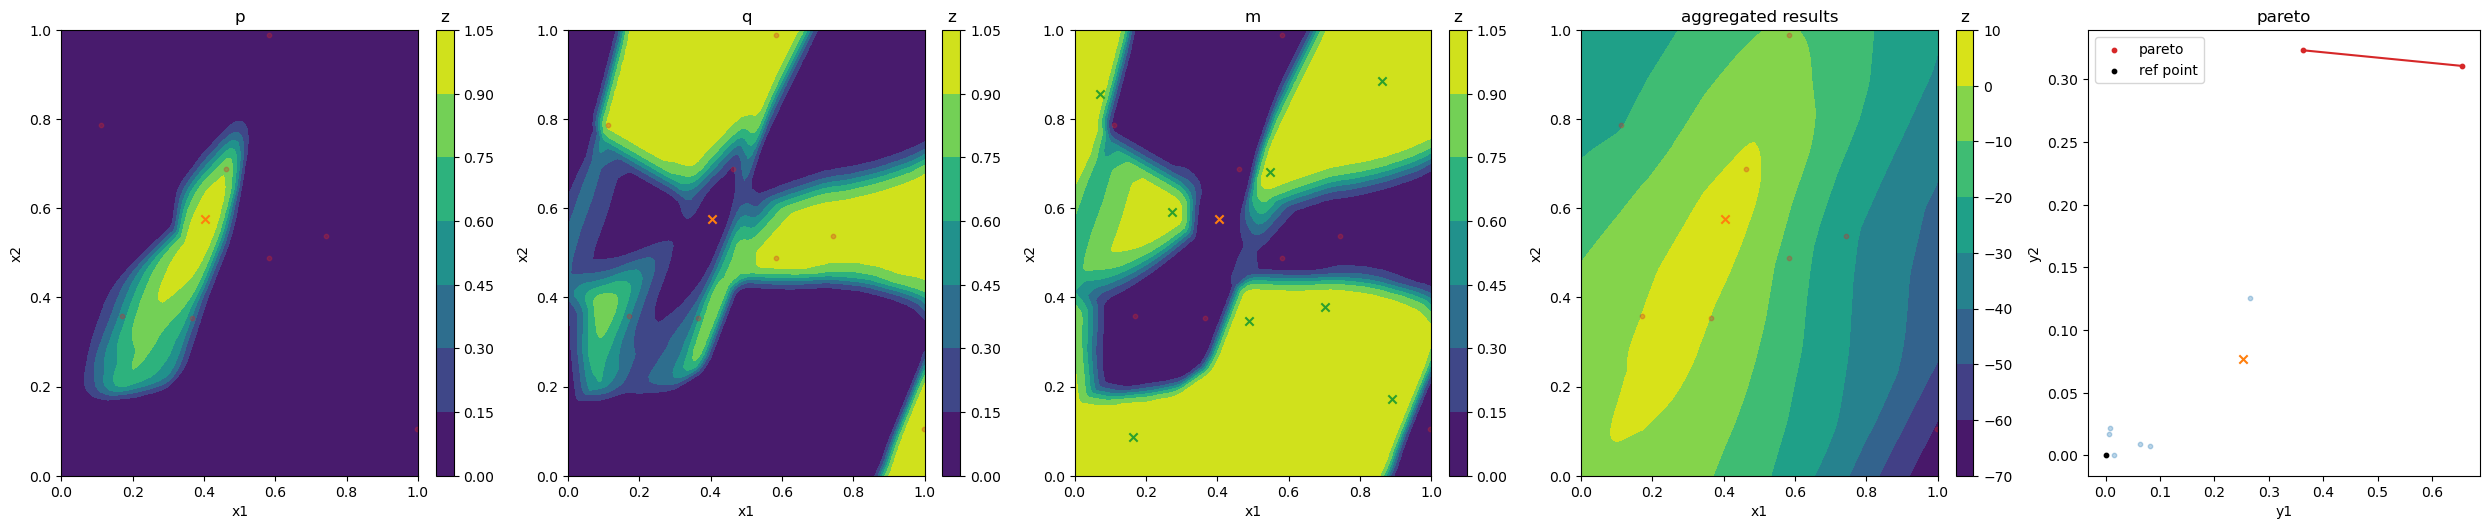

Iteration 3


2024-05-07 10:30:27,611 | Model fitting takes 0.68s
2024-05-07 10:30:27,614 | Optimizing the acquisition function takes 0.00s


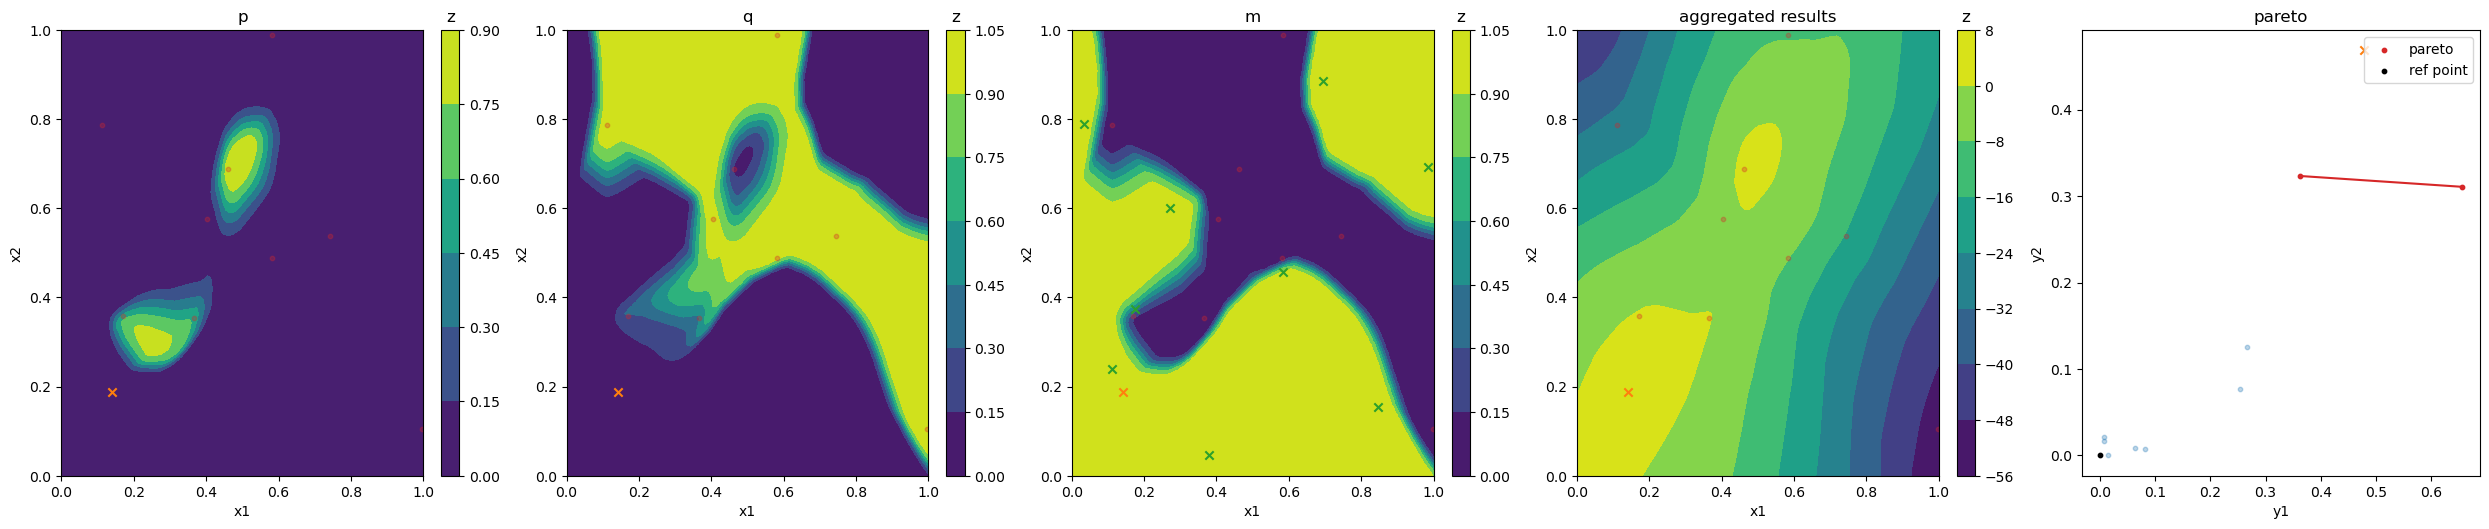

Iteration 4


2024-05-07 10:30:29,148 | Model fitting takes 0.68s
2024-05-07 10:30:29,151 | Optimizing the acquisition function takes 0.00s


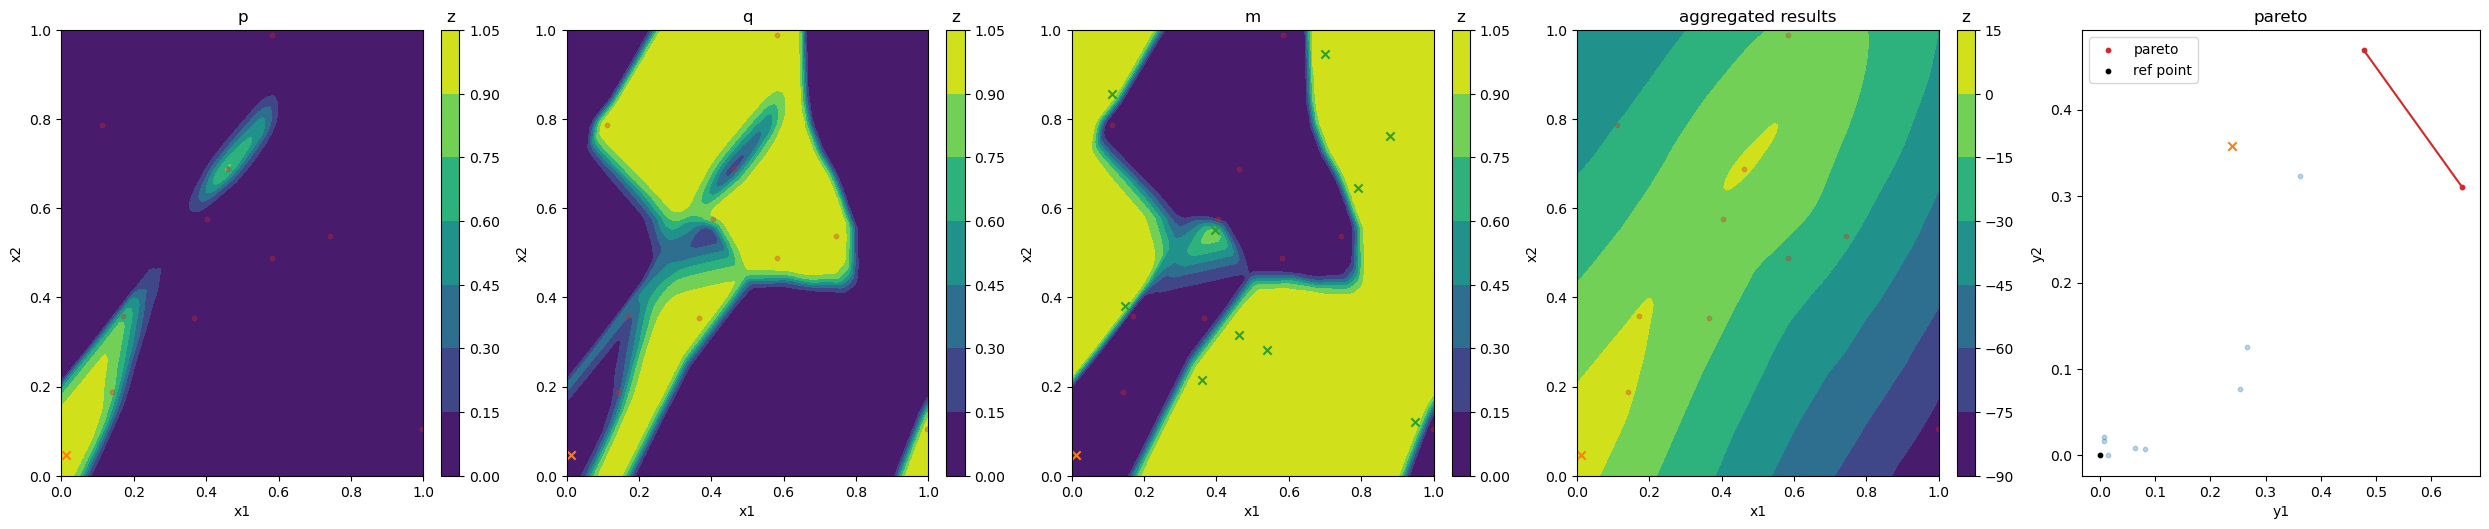

Iteration 5


2024-05-07 10:30:30,888 | Model fitting takes 0.70s
2024-05-07 10:30:30,890 | Optimizing the acquisition function takes 0.00s


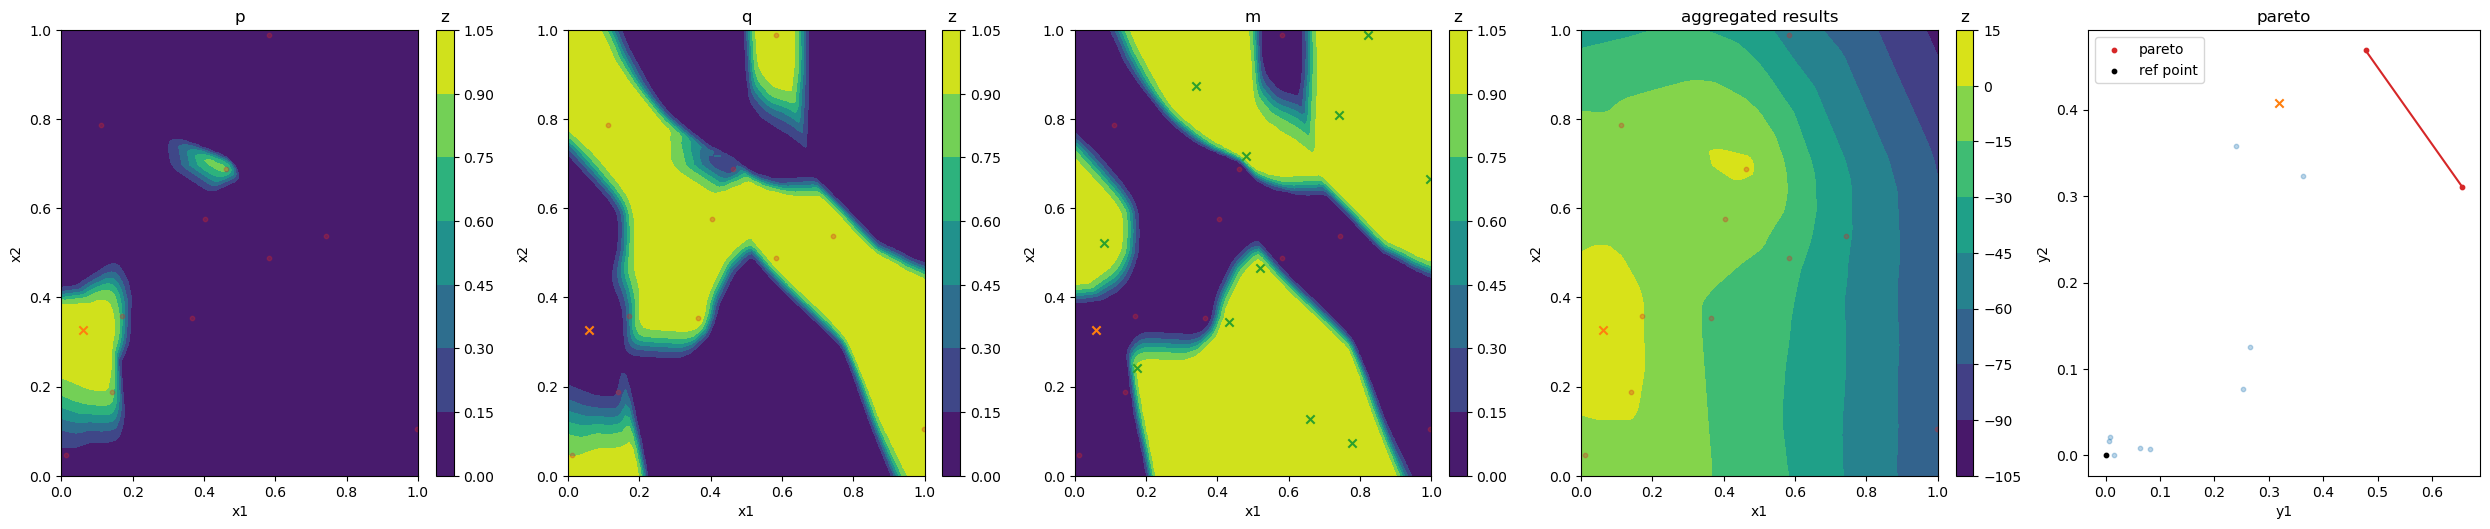

Iteration 6


2024-05-07 10:30:32,444 | Model fitting takes 0.70s
2024-05-07 10:30:32,447 | Optimizing the acquisition function takes 0.00s


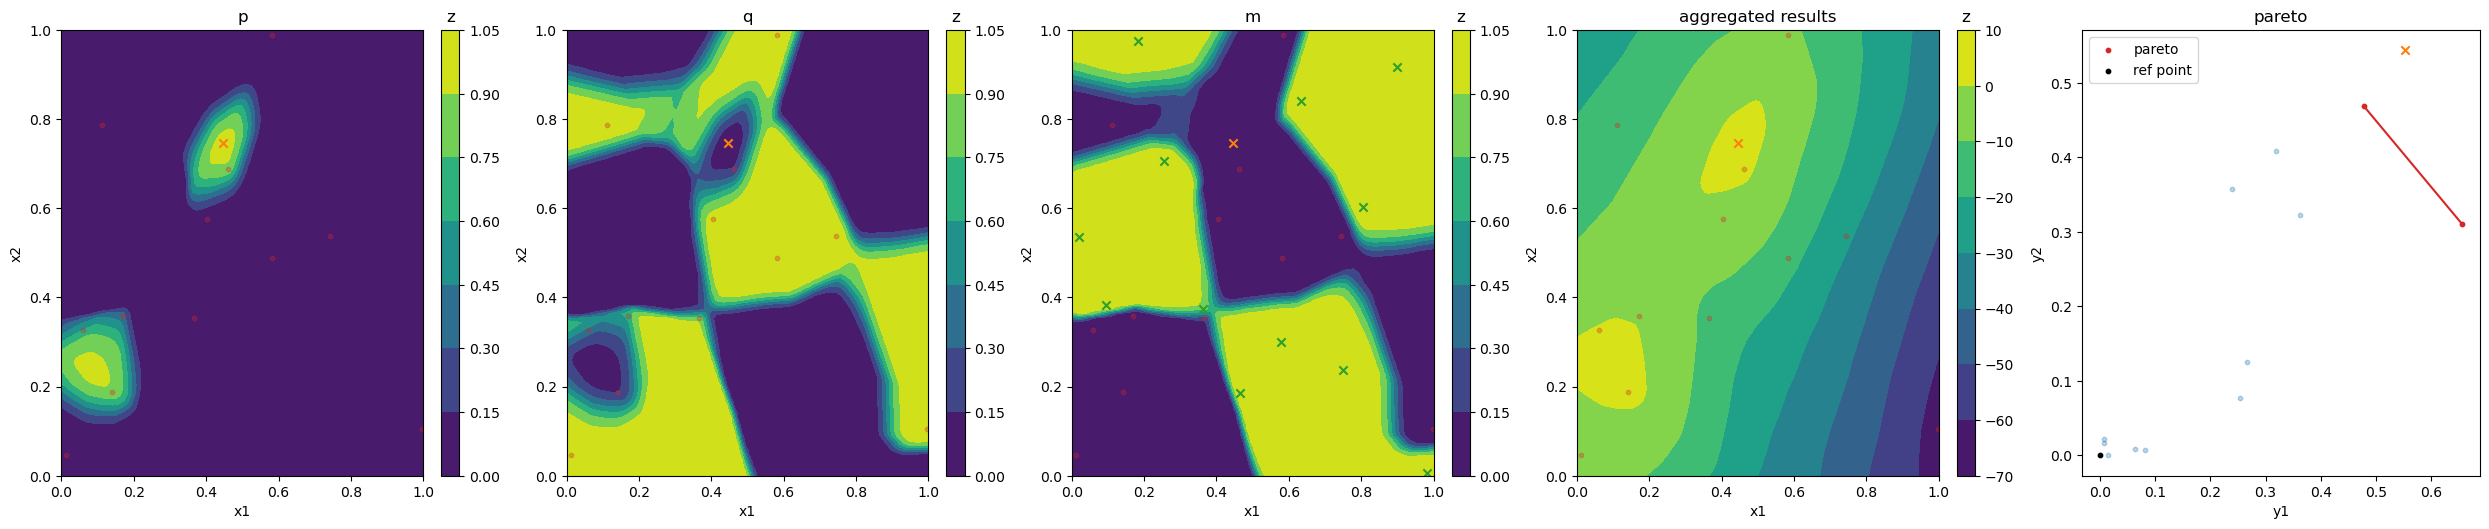

Iteration 7


2024-05-07 10:30:34,013 | Model fitting takes 0.70s
2024-05-07 10:30:34,016 | Optimizing the acquisition function takes 0.00s


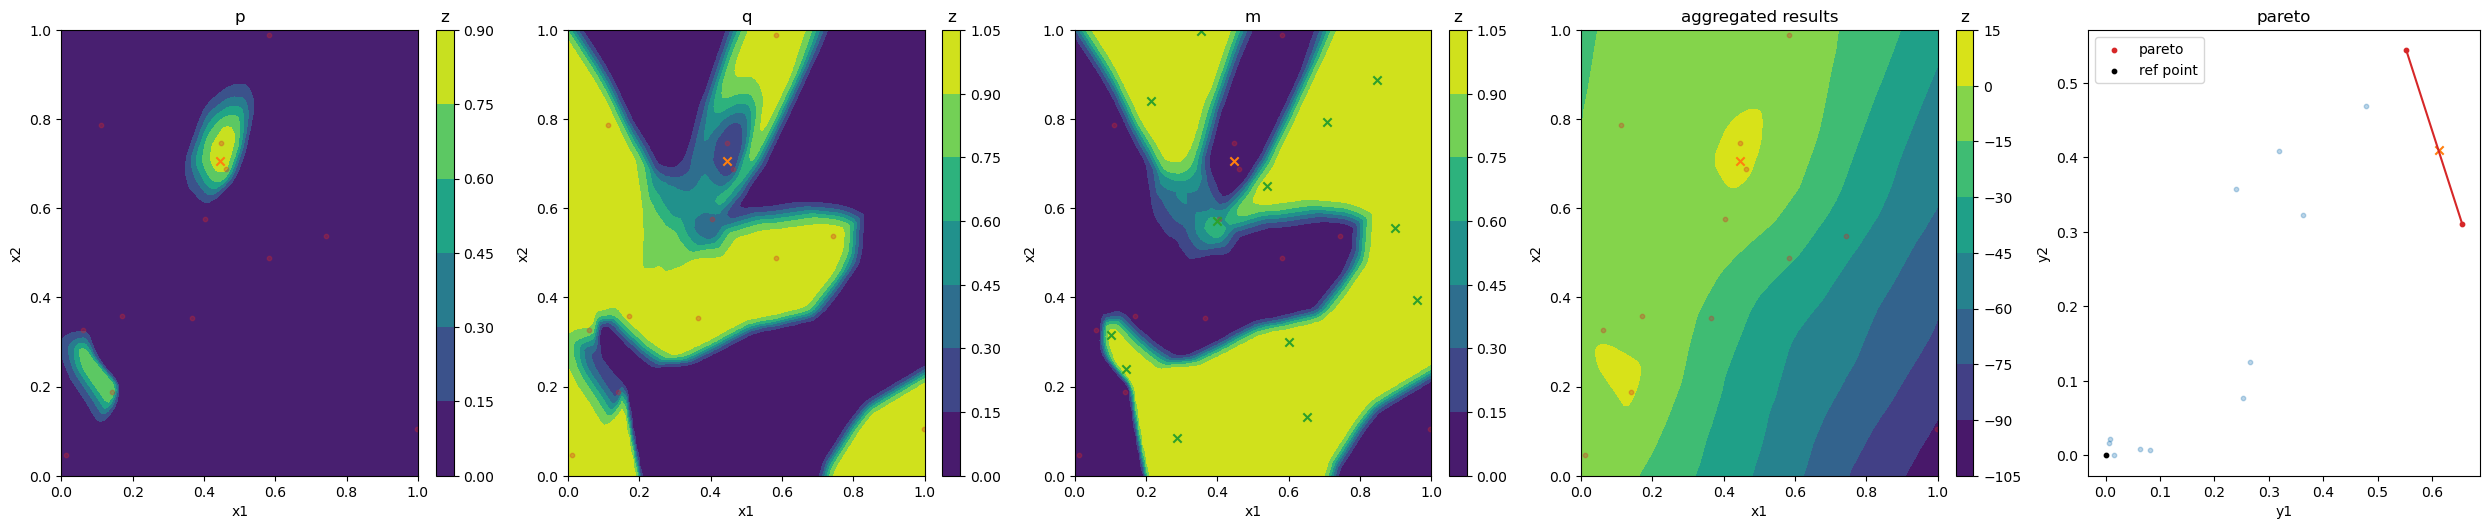

Iteration 8


2024-05-07 10:30:35,575 | Model fitting takes 0.71s
2024-05-07 10:30:35,578 | Optimizing the acquisition function takes 0.00s


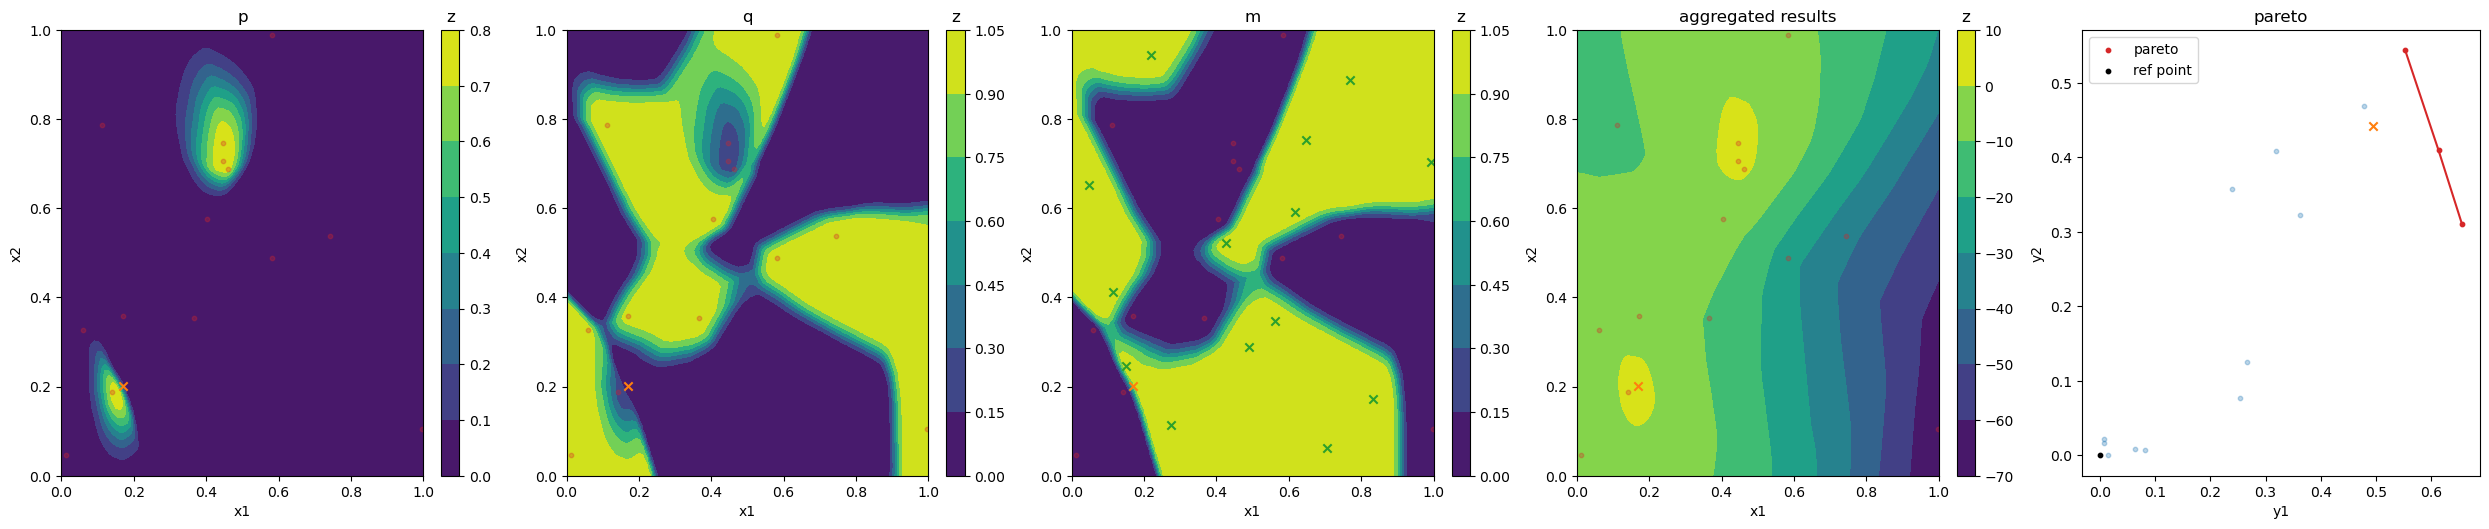

Iteration 9


2024-05-07 10:30:37,363 | Model fitting takes 0.73s
2024-05-07 10:30:37,365 | Optimizing the acquisition function takes 0.00s


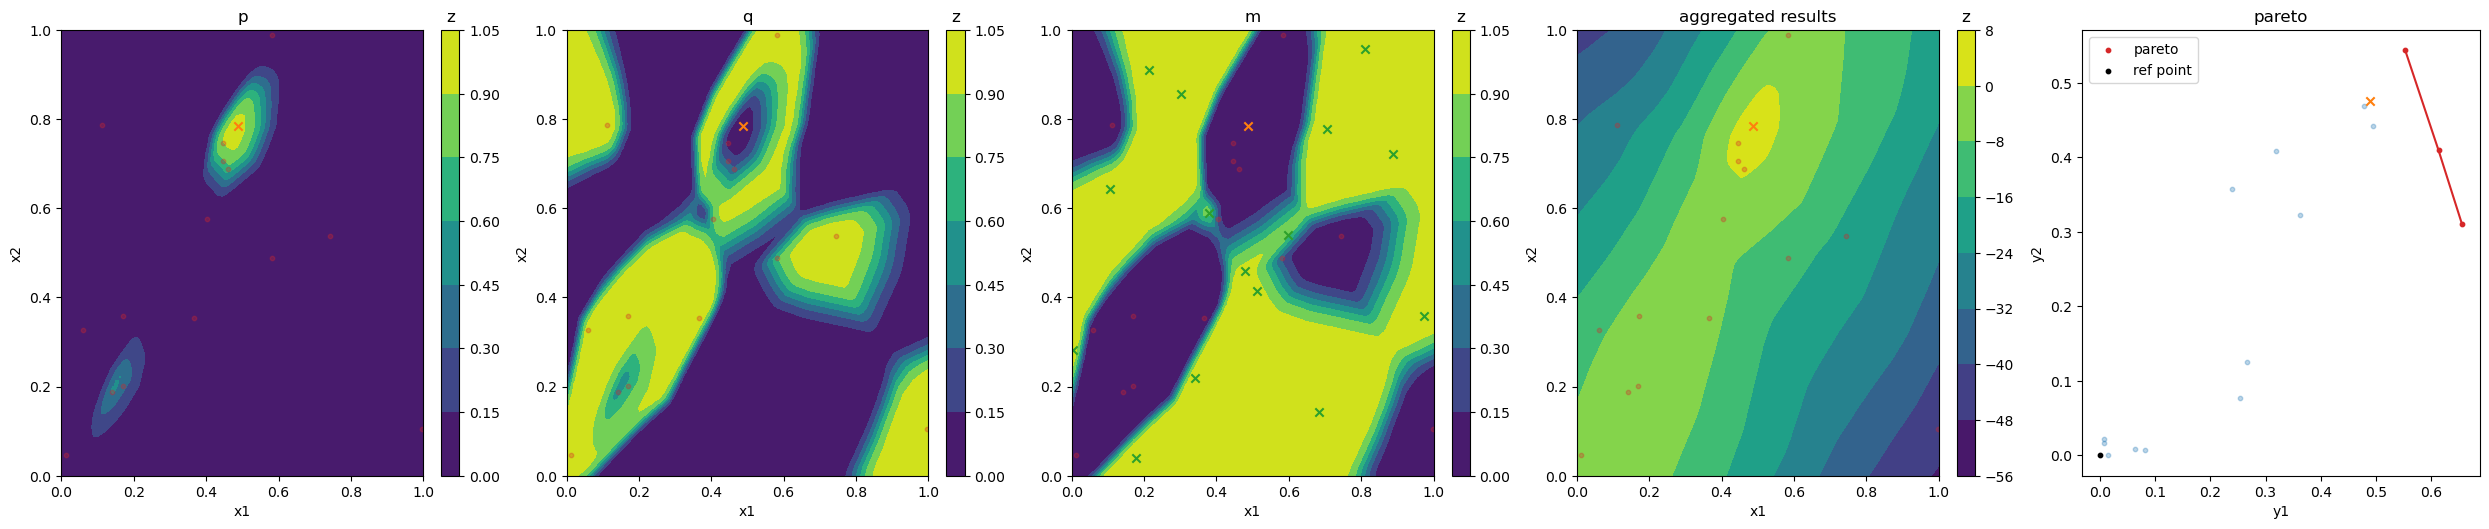

Iteration 10


2024-05-07 10:30:38,953 | Model fitting takes 0.73s
2024-05-07 10:30:38,956 | Optimizing the acquisition function takes 0.00s


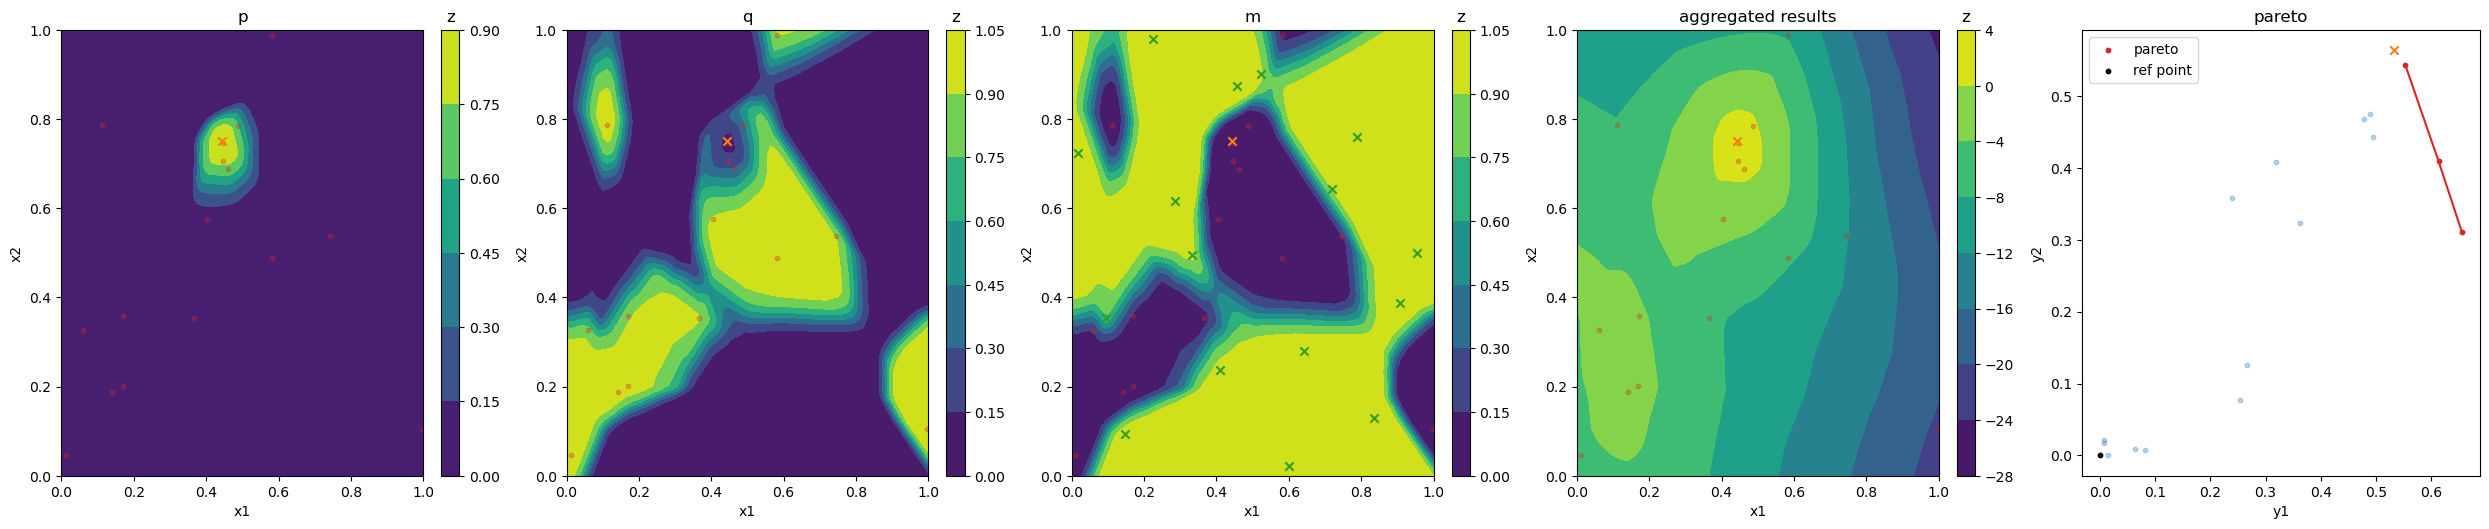

Iteration 11


2024-05-07 10:30:40,550 | Model fitting takes 0.74s
2024-05-07 10:30:40,553 | Optimizing the acquisition function takes 0.00s


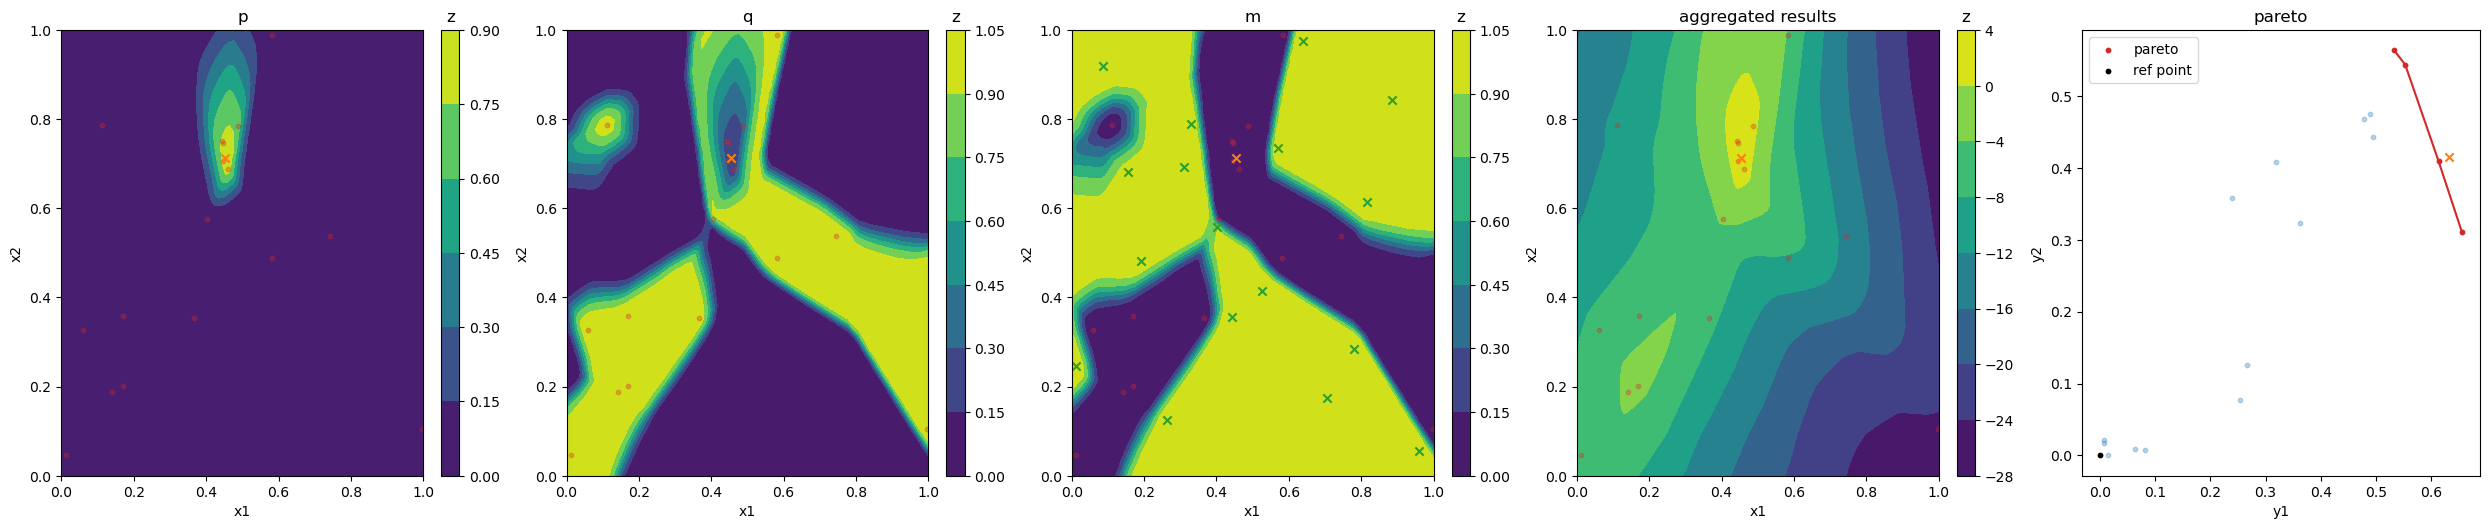

Iteration 12


2024-05-07 10:30:42,325 | Model fitting takes 0.75s
2024-05-07 10:30:42,328 | Optimizing the acquisition function takes 0.00s


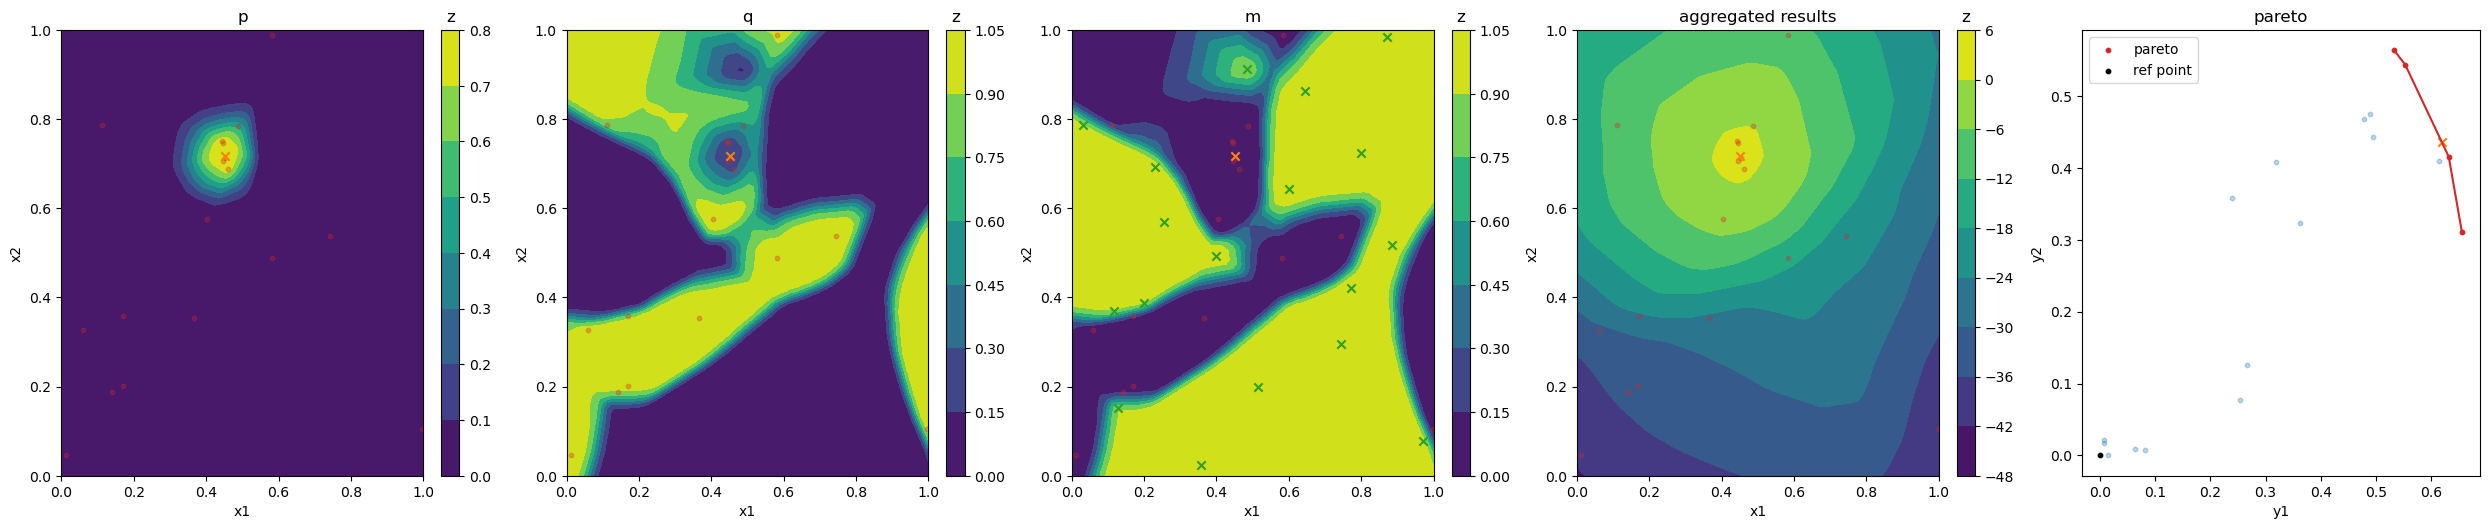

Iteration 13


2024-05-07 10:30:43,948 | Model fitting takes 0.75s
2024-05-07 10:30:43,950 | Optimizing the acquisition function takes 0.00s


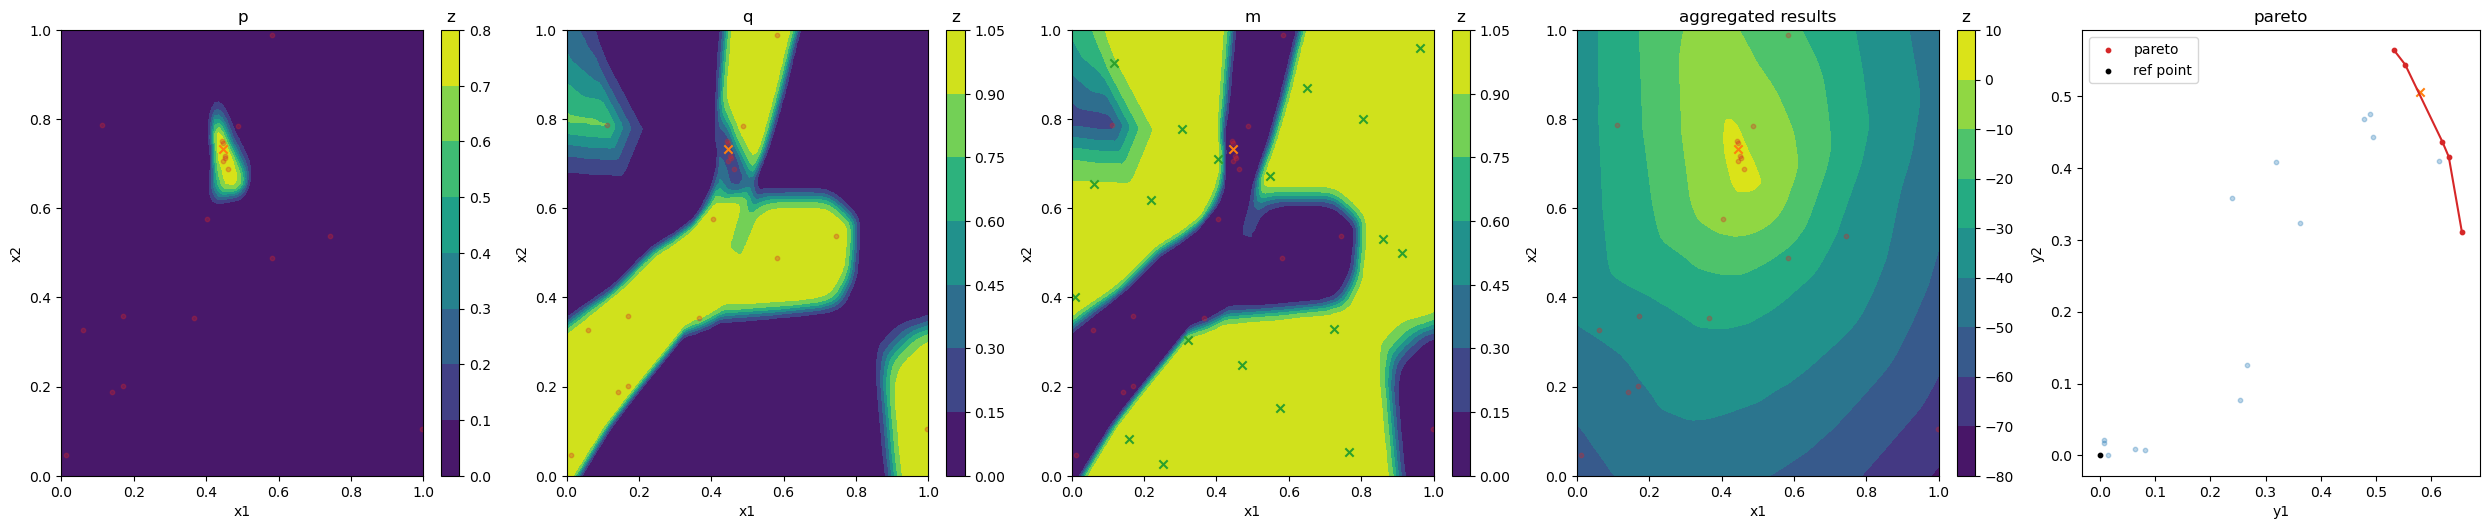

Iteration 14


2024-05-07 10:30:45,584 | Model fitting takes 0.76s
2024-05-07 10:30:45,586 | Optimizing the acquisition function takes 0.00s


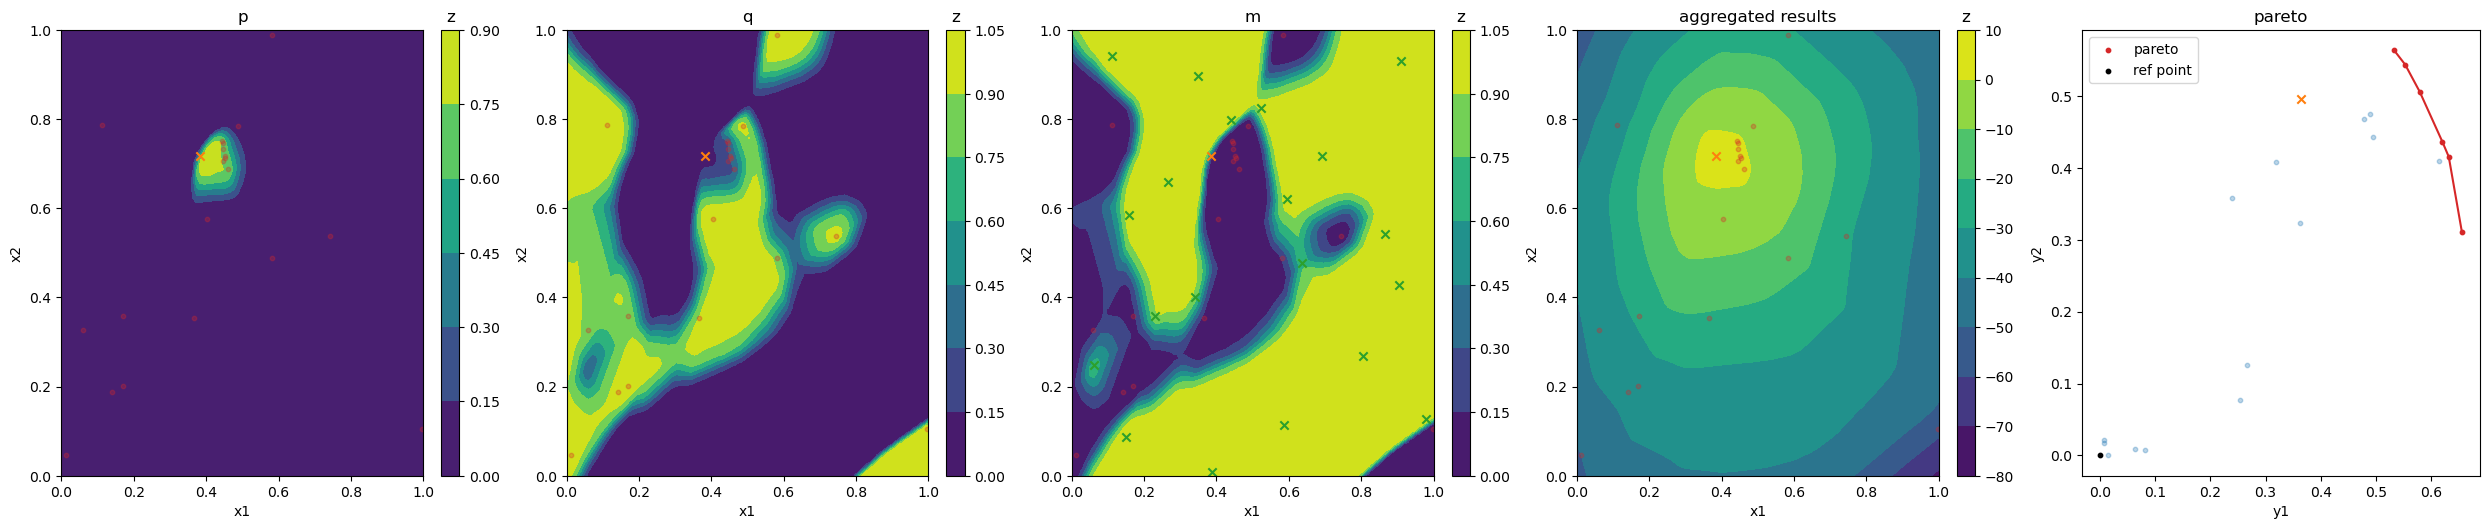

Iteration 15


2024-05-07 10:30:47,206 | Model fitting takes 0.77s
2024-05-07 10:30:47,209 | Optimizing the acquisition function takes 0.00s


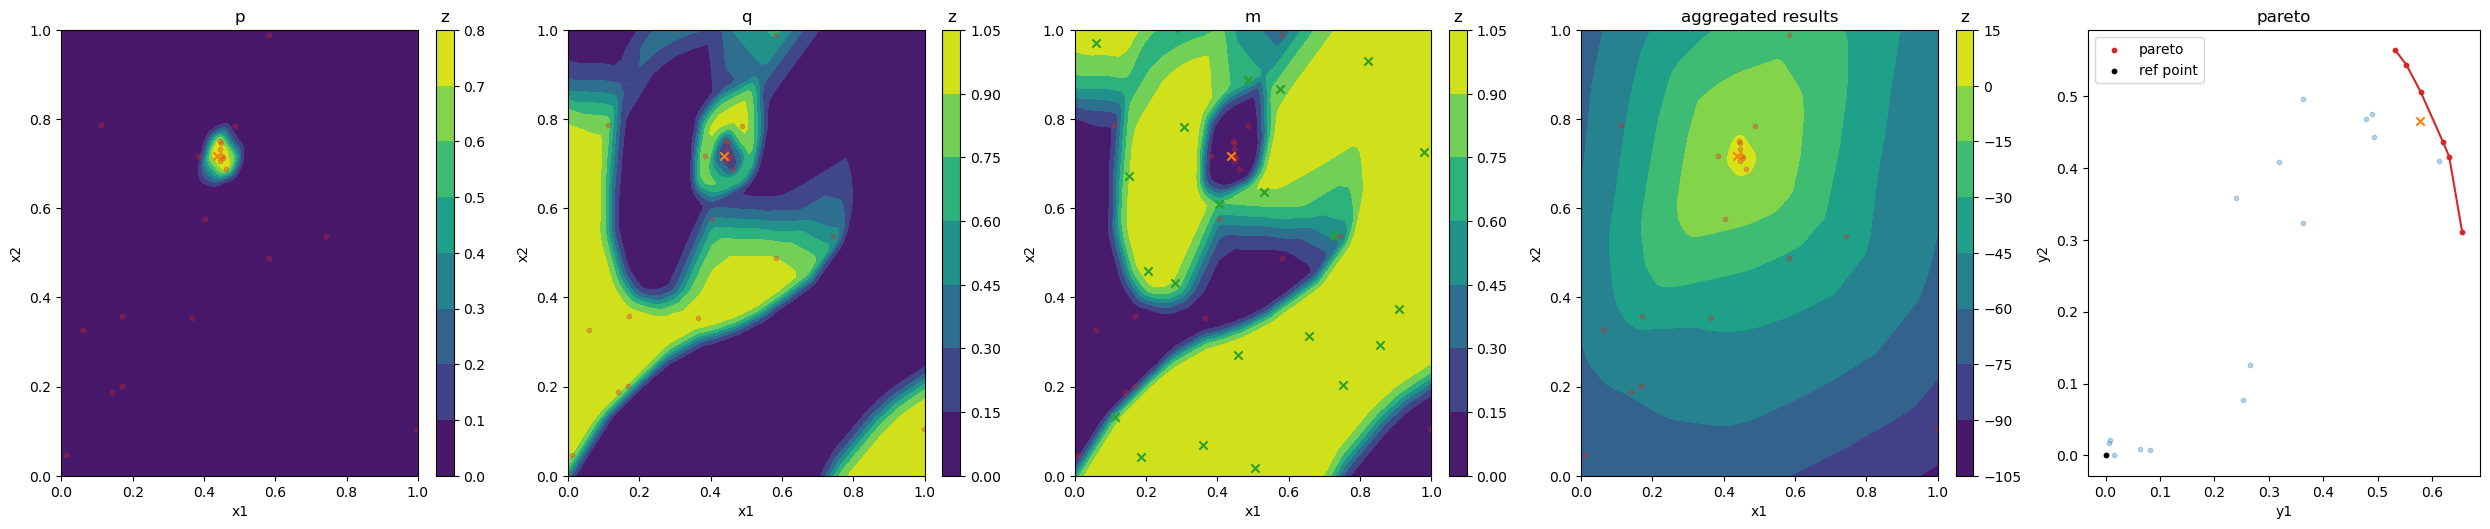

Iteration 16


2024-05-07 10:30:49,020 | Model fitting takes 0.78s
2024-05-07 10:30:49,023 | Optimizing the acquisition function takes 0.00s


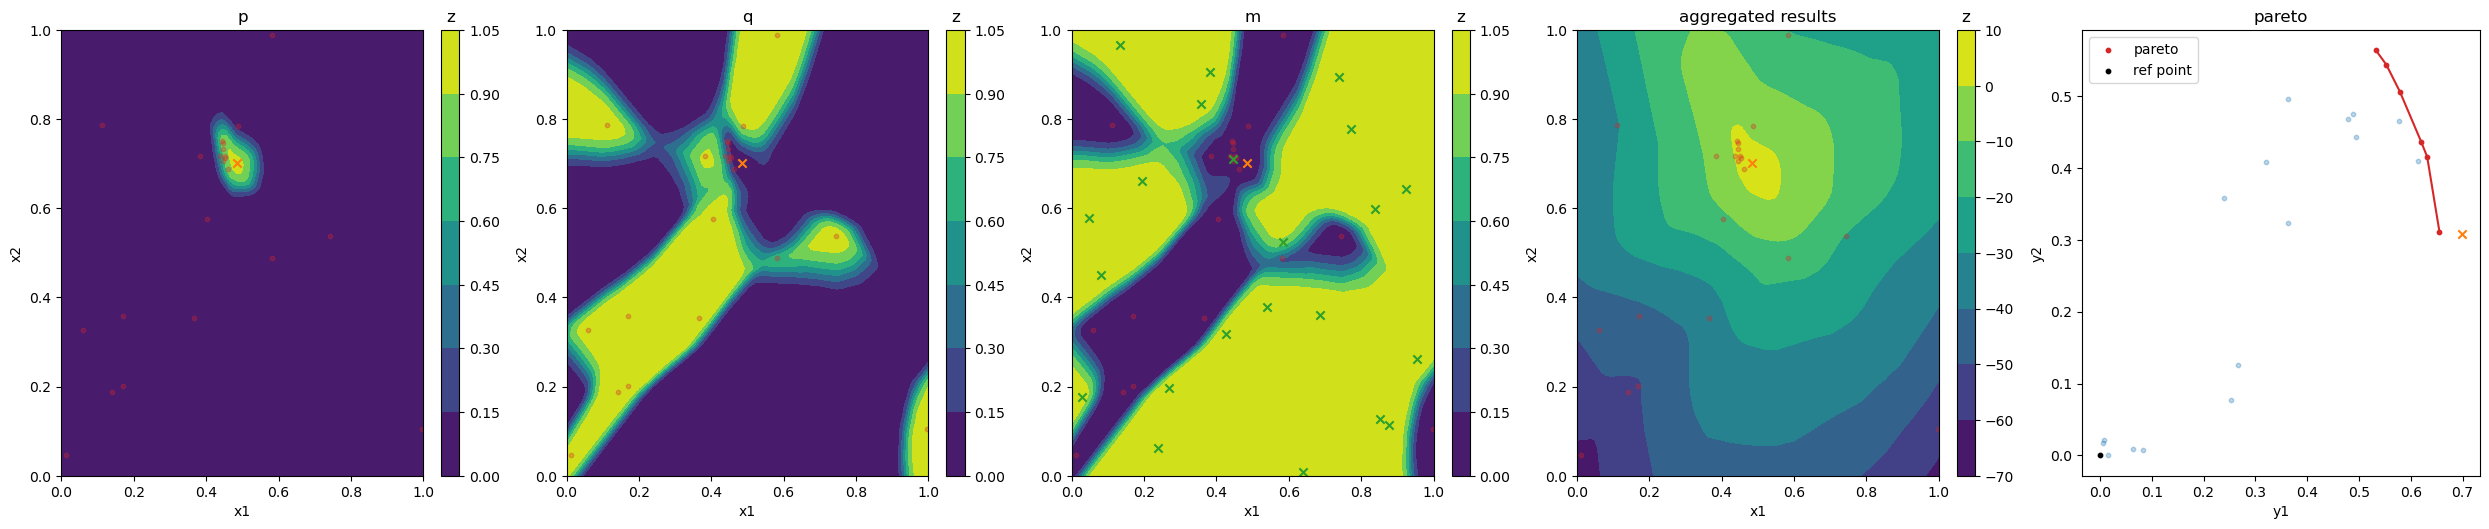

Iteration 17


2024-05-07 10:30:50,681 | Model fitting takes 0.80s
2024-05-07 10:30:50,683 | Optimizing the acquisition function takes 0.00s


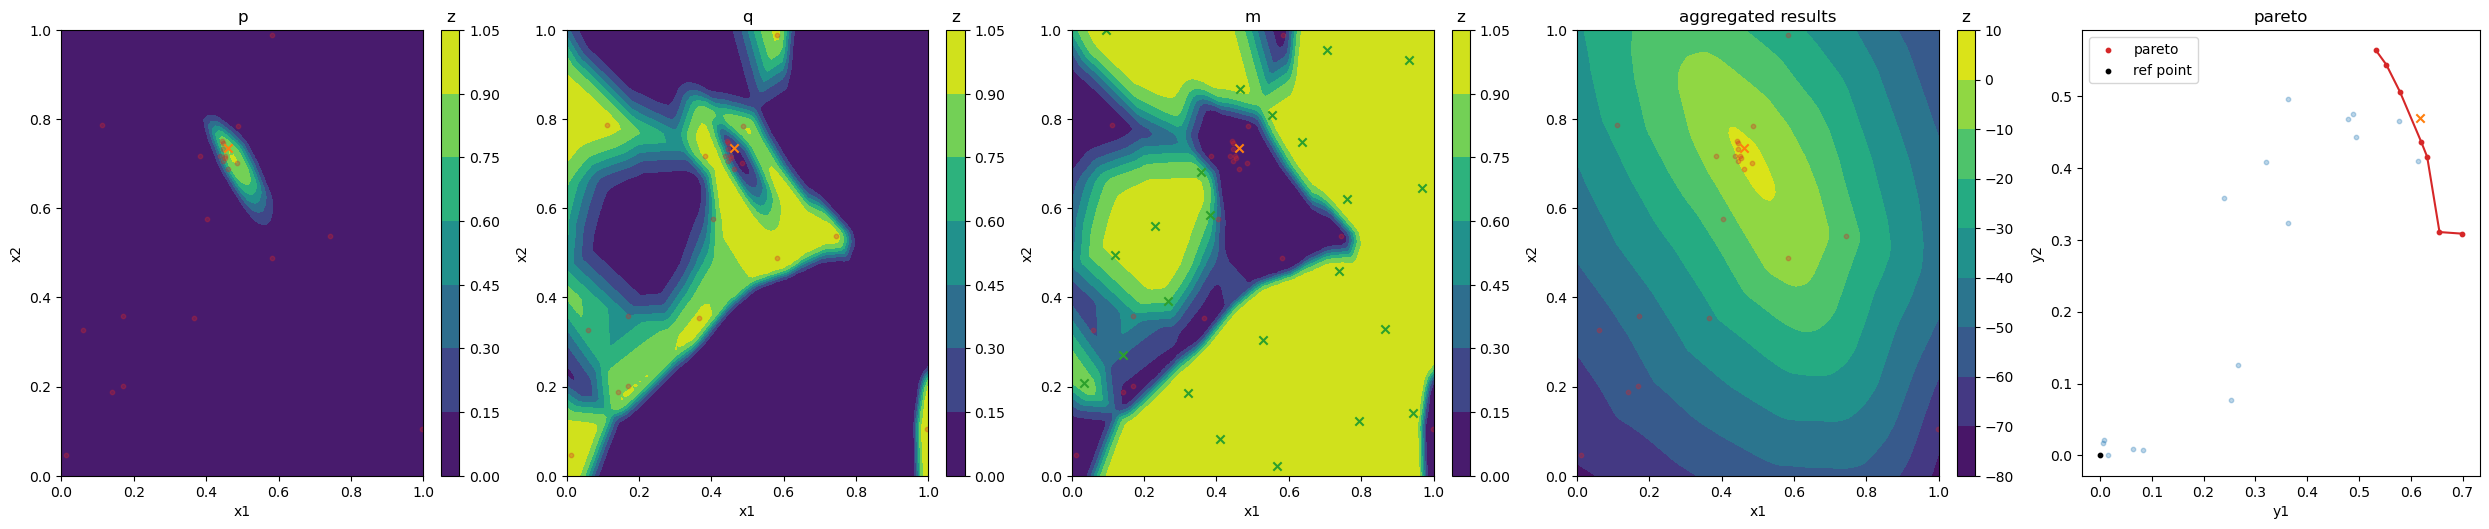

Iteration 18


2024-05-07 10:30:52,355 | Model fitting takes 0.80s
2024-05-07 10:30:52,358 | Optimizing the acquisition function takes 0.00s


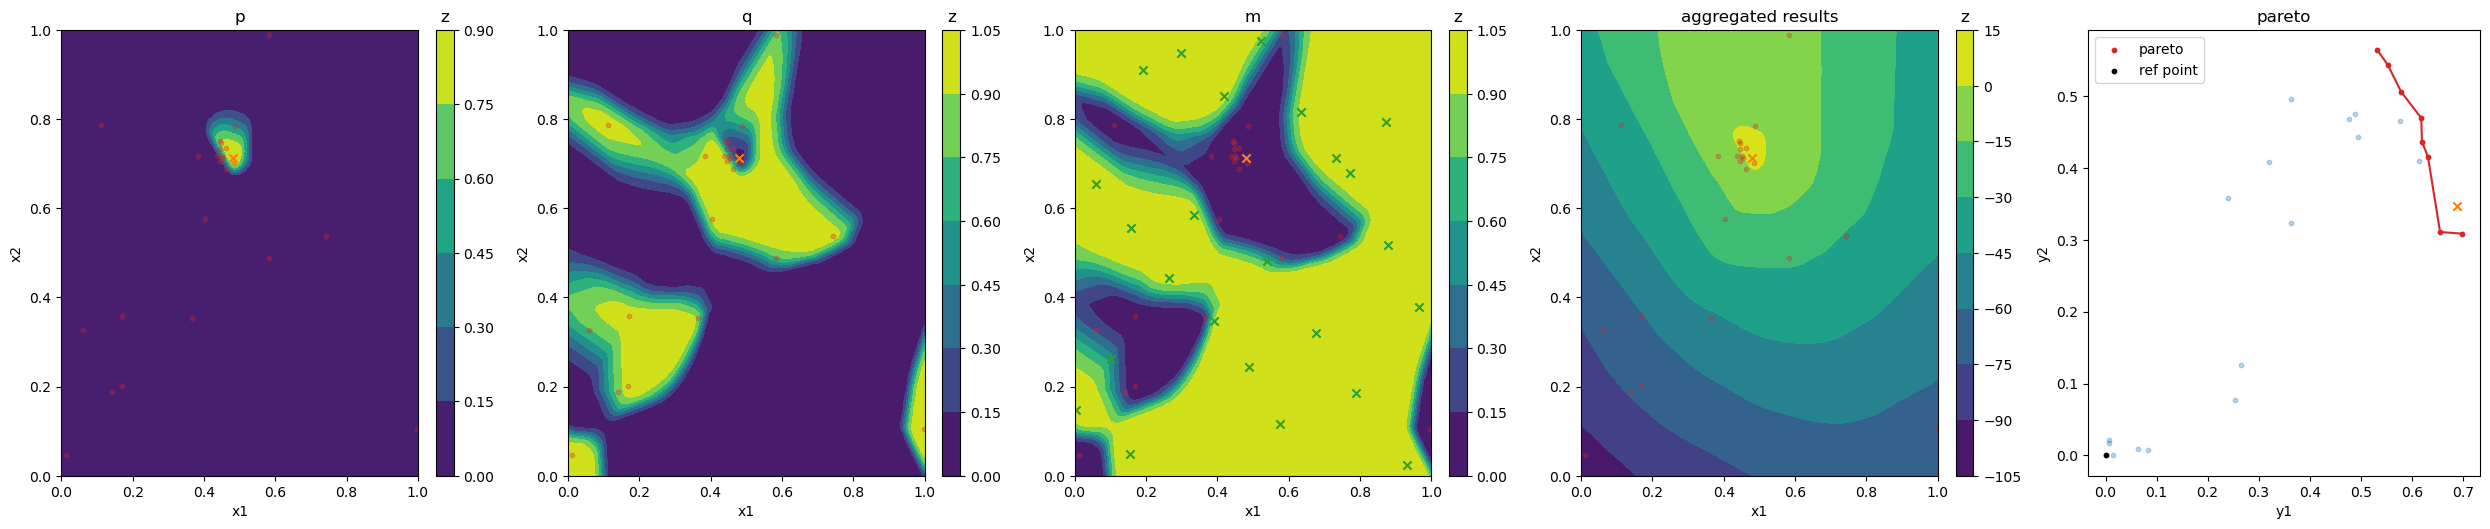

Iteration 19


2024-05-07 10:30:54,021 | Model fitting takes 0.80s
2024-05-07 10:30:54,023 | Optimizing the acquisition function takes 0.00s


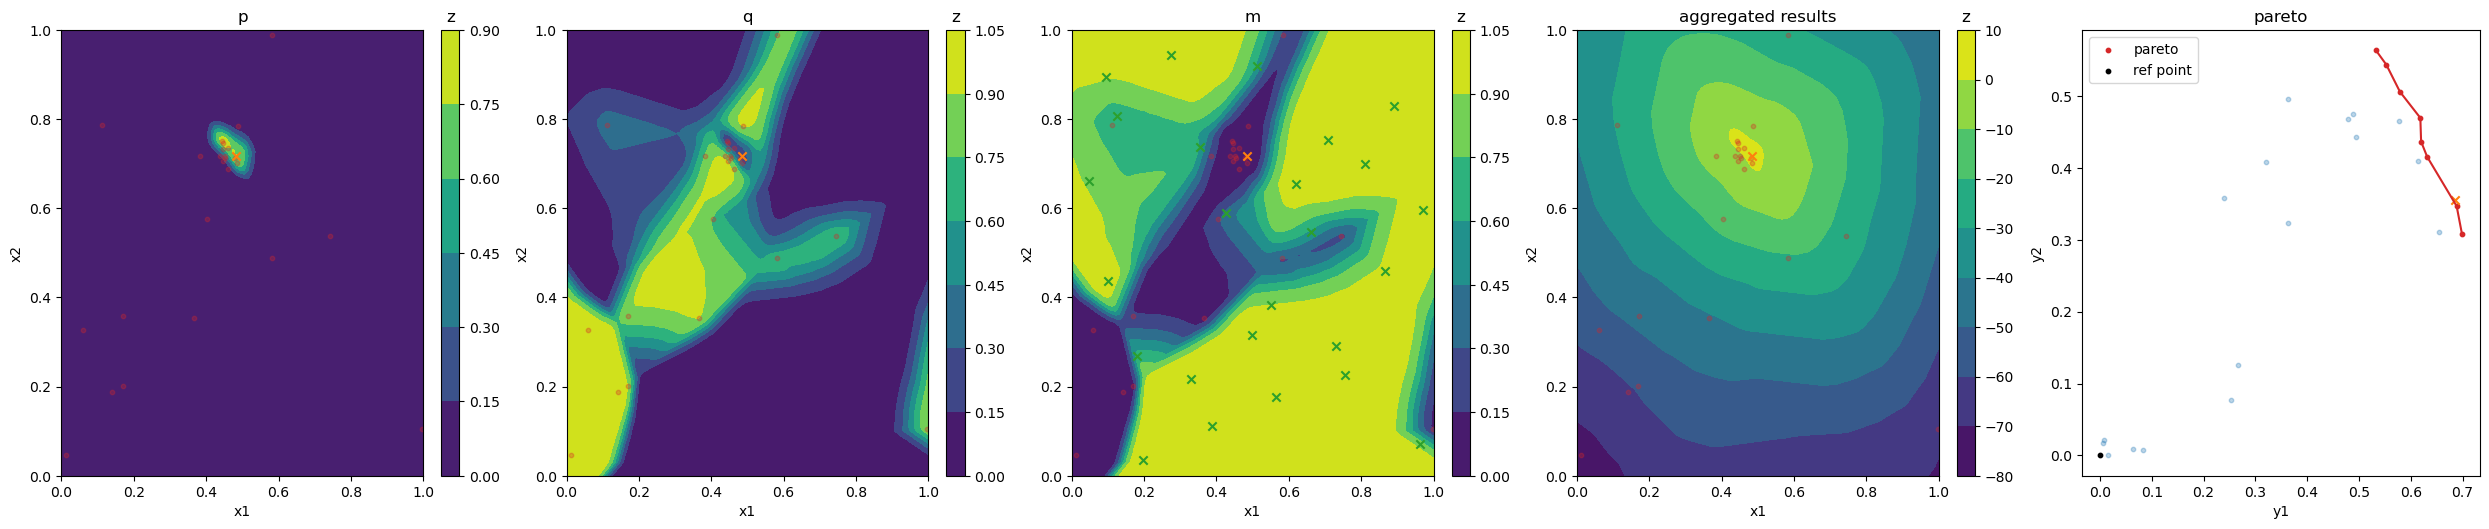

Iteration 20


2024-05-07 10:30:55,894 | Model fitting takes 0.82s
2024-05-07 10:30:55,896 | Optimizing the acquisition function takes 0.00s


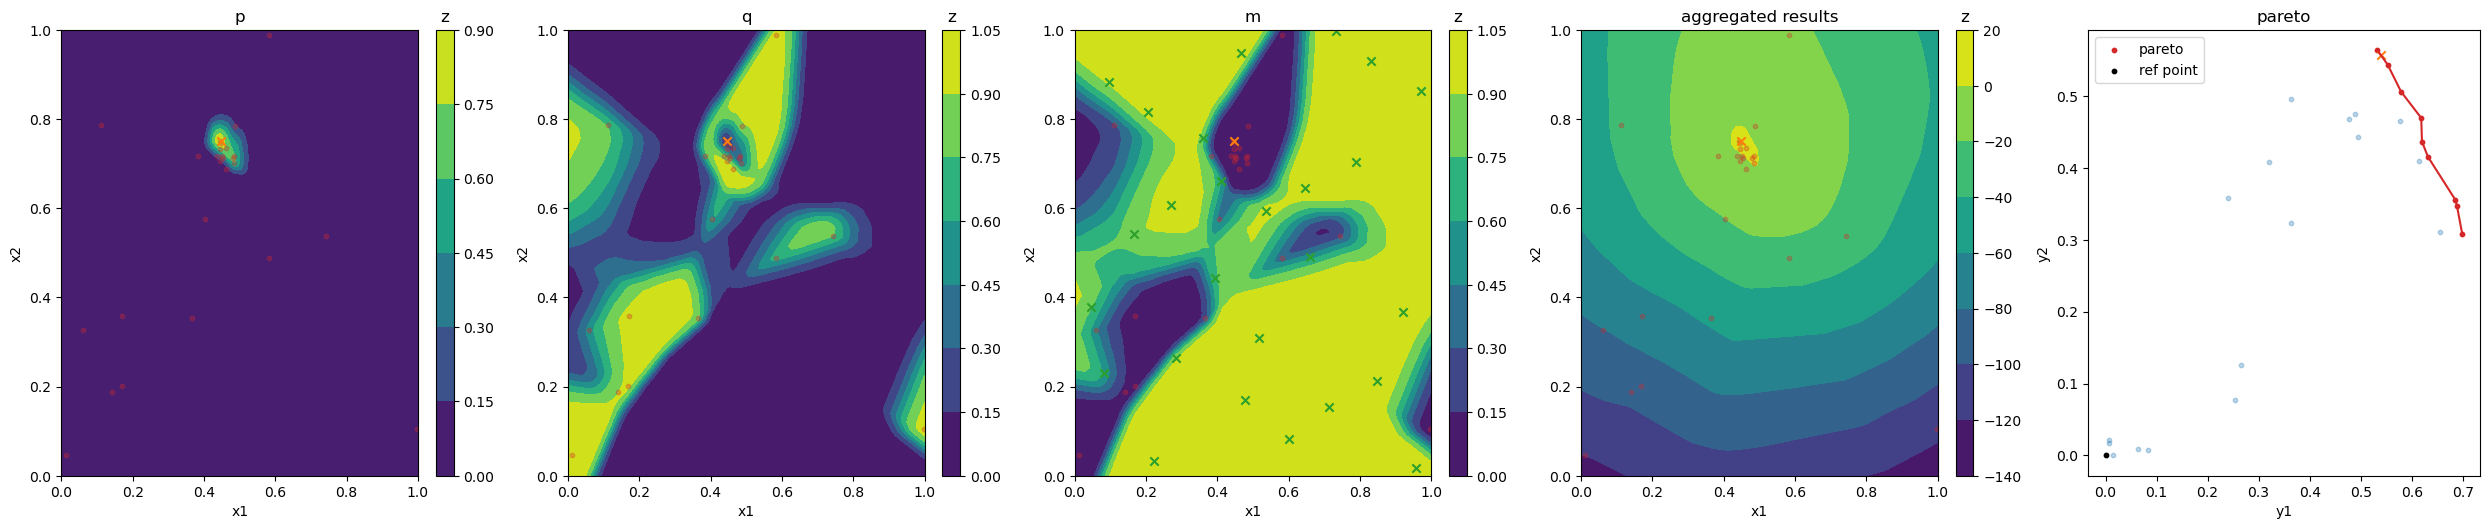

Iteration 21


2024-05-07 10:30:57,576 | Model fitting takes 0.83s
2024-05-07 10:30:57,578 | Optimizing the acquisition function takes 0.00s


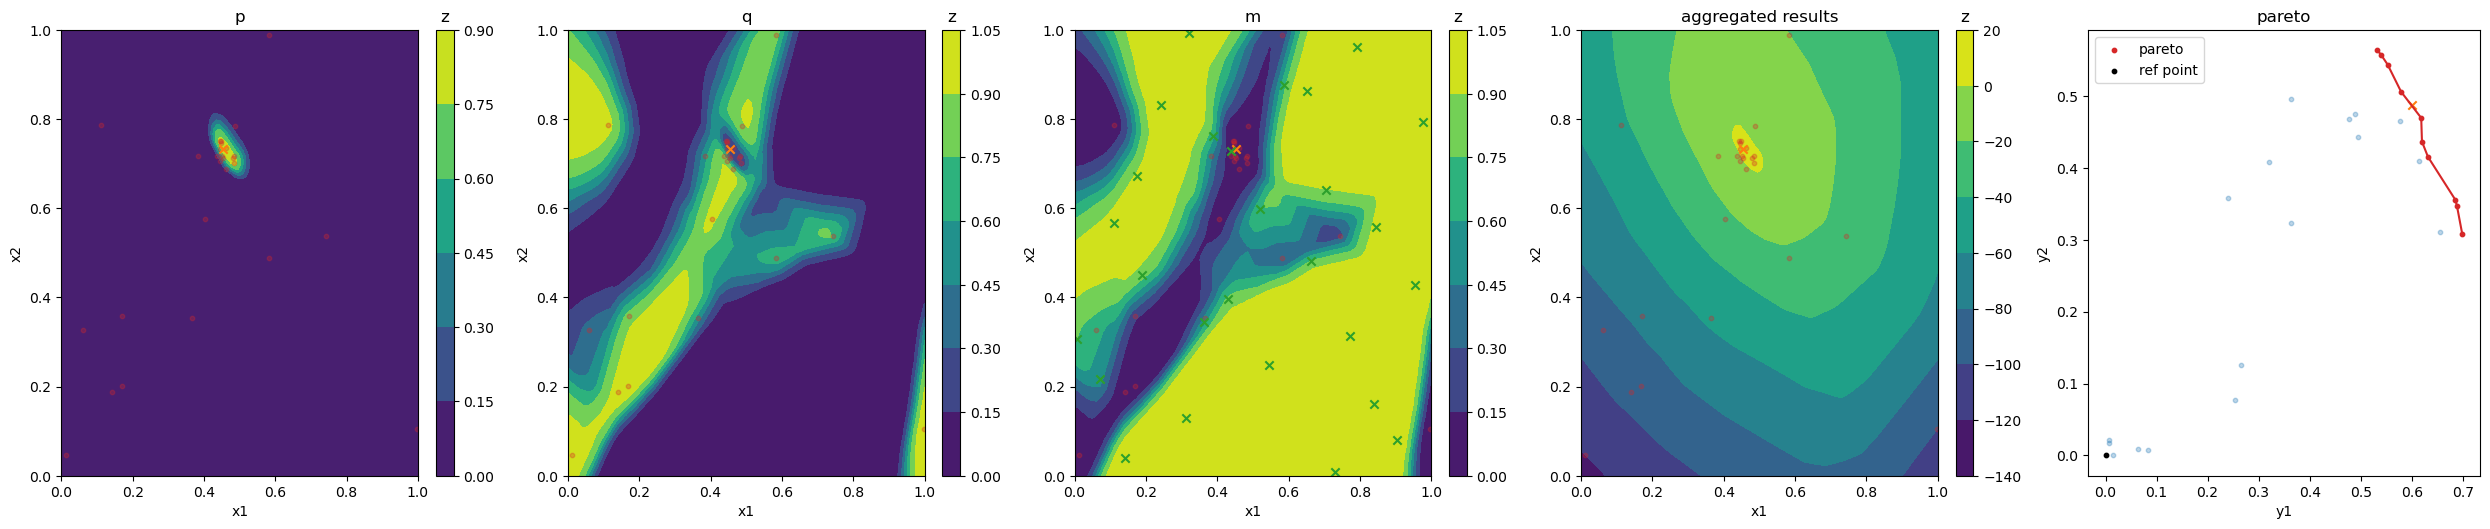

Iteration 22


2024-05-07 10:30:59,266 | Model fitting takes 0.83s
2024-05-07 10:30:59,269 | Optimizing the acquisition function takes 0.00s


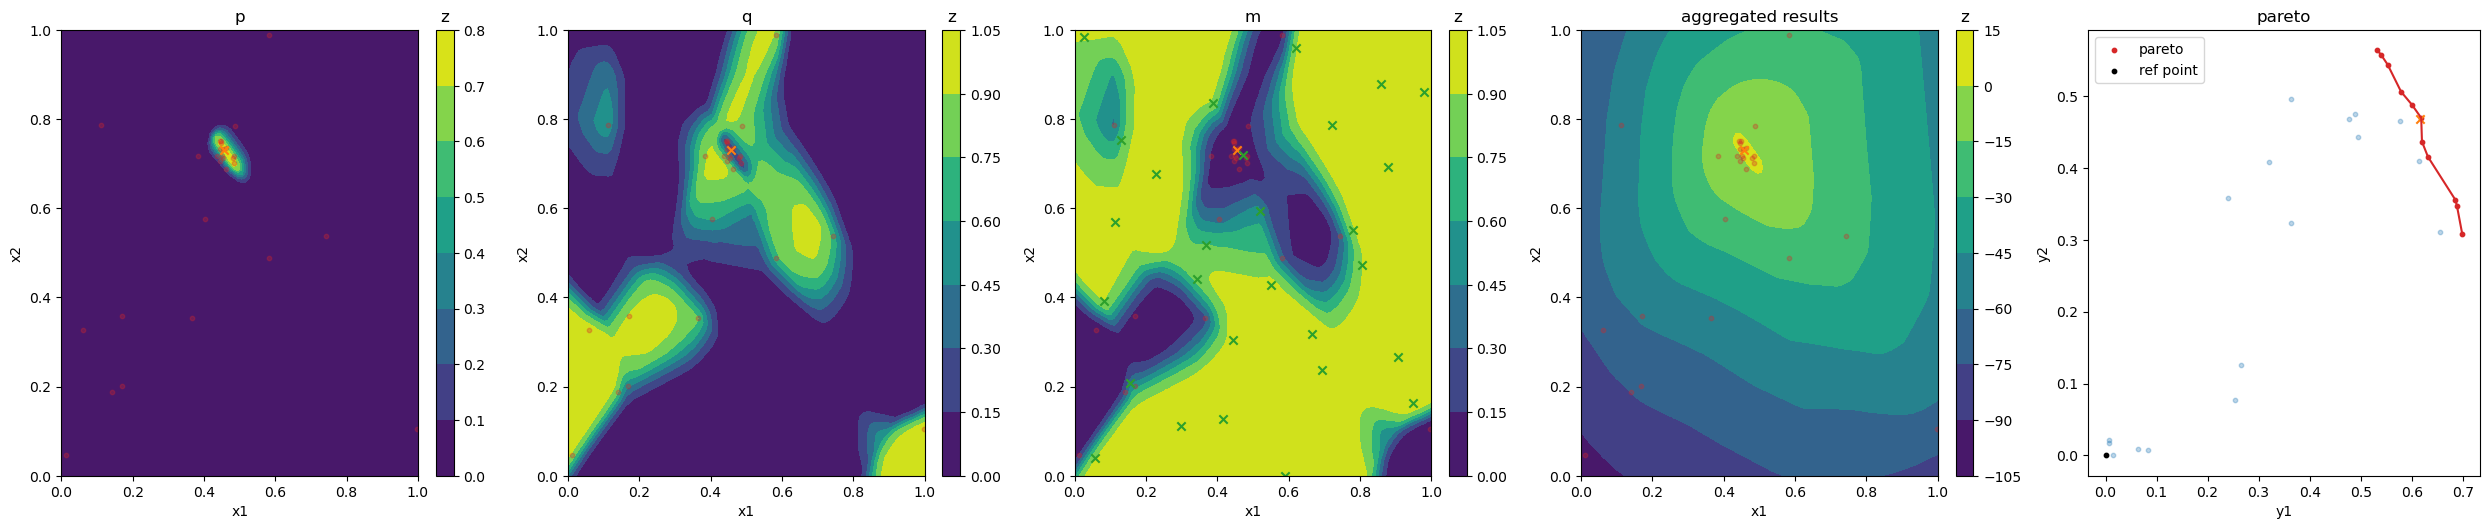

Iteration 23


2024-05-07 10:31:01,168 | Model fitting takes 0.85s
2024-05-07 10:31:01,170 | Optimizing the acquisition function takes 0.00s


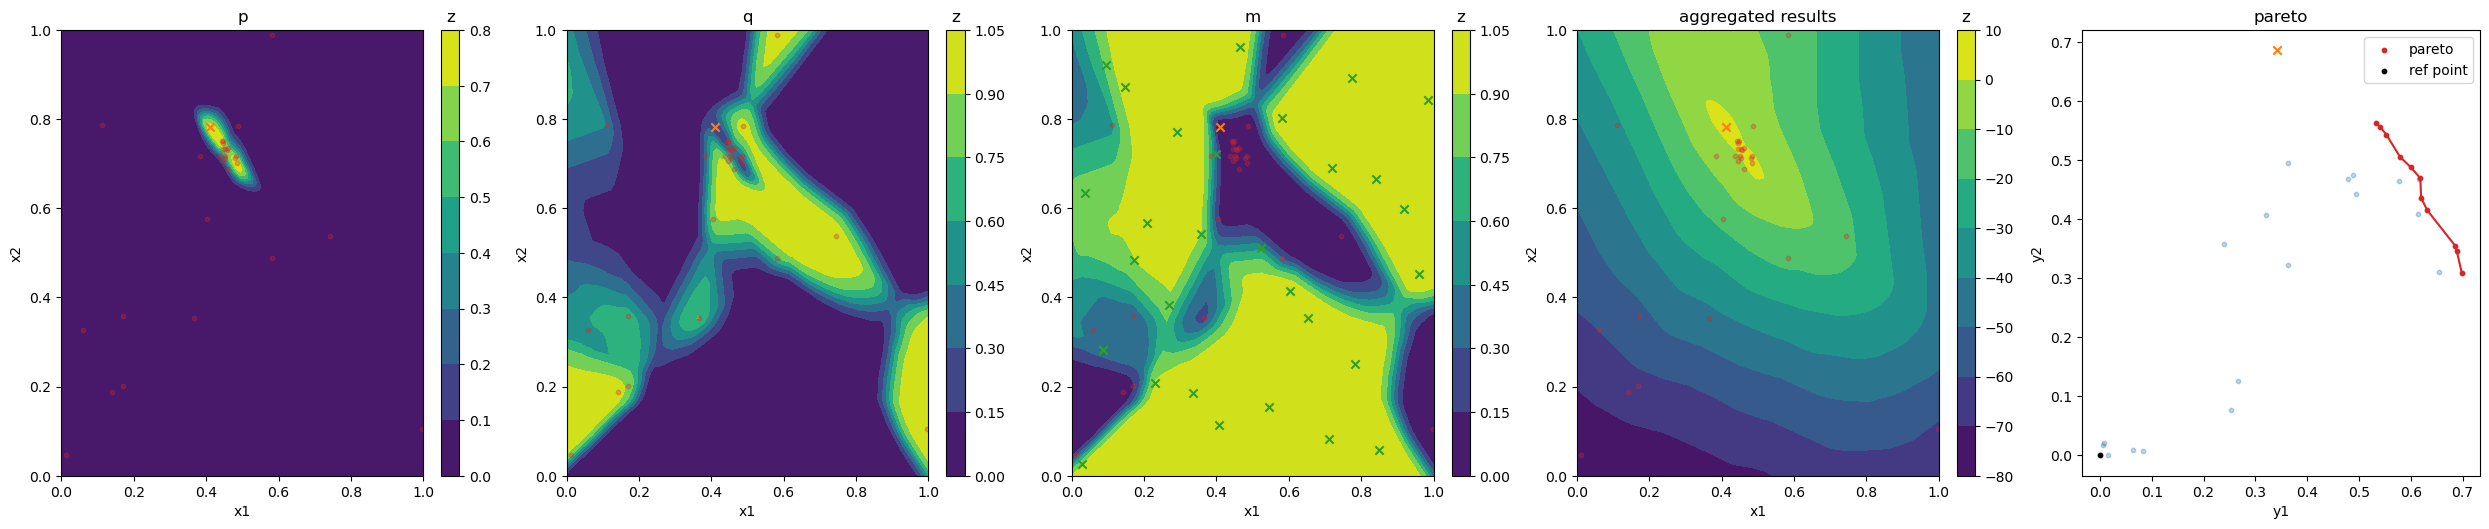

Iteration 24


2024-05-07 10:31:02,906 | Model fitting takes 0.86s
2024-05-07 10:31:02,909 | Optimizing the acquisition function takes 0.00s


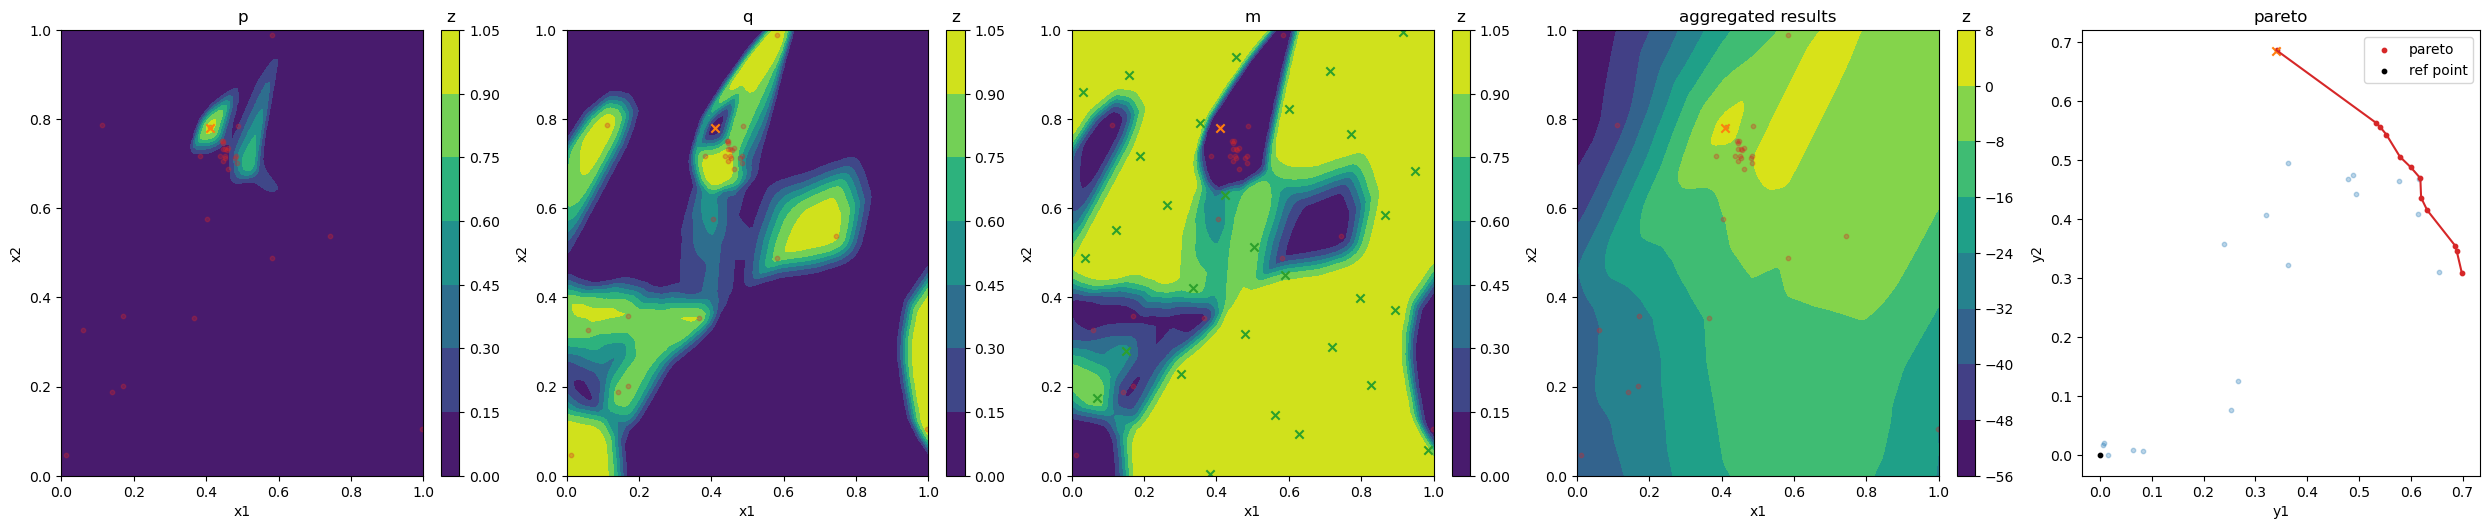

Iteration 25


2024-05-07 10:31:04,626 | Model fitting takes 0.85s
2024-05-07 10:31:04,629 | Optimizing the acquisition function takes 0.00s


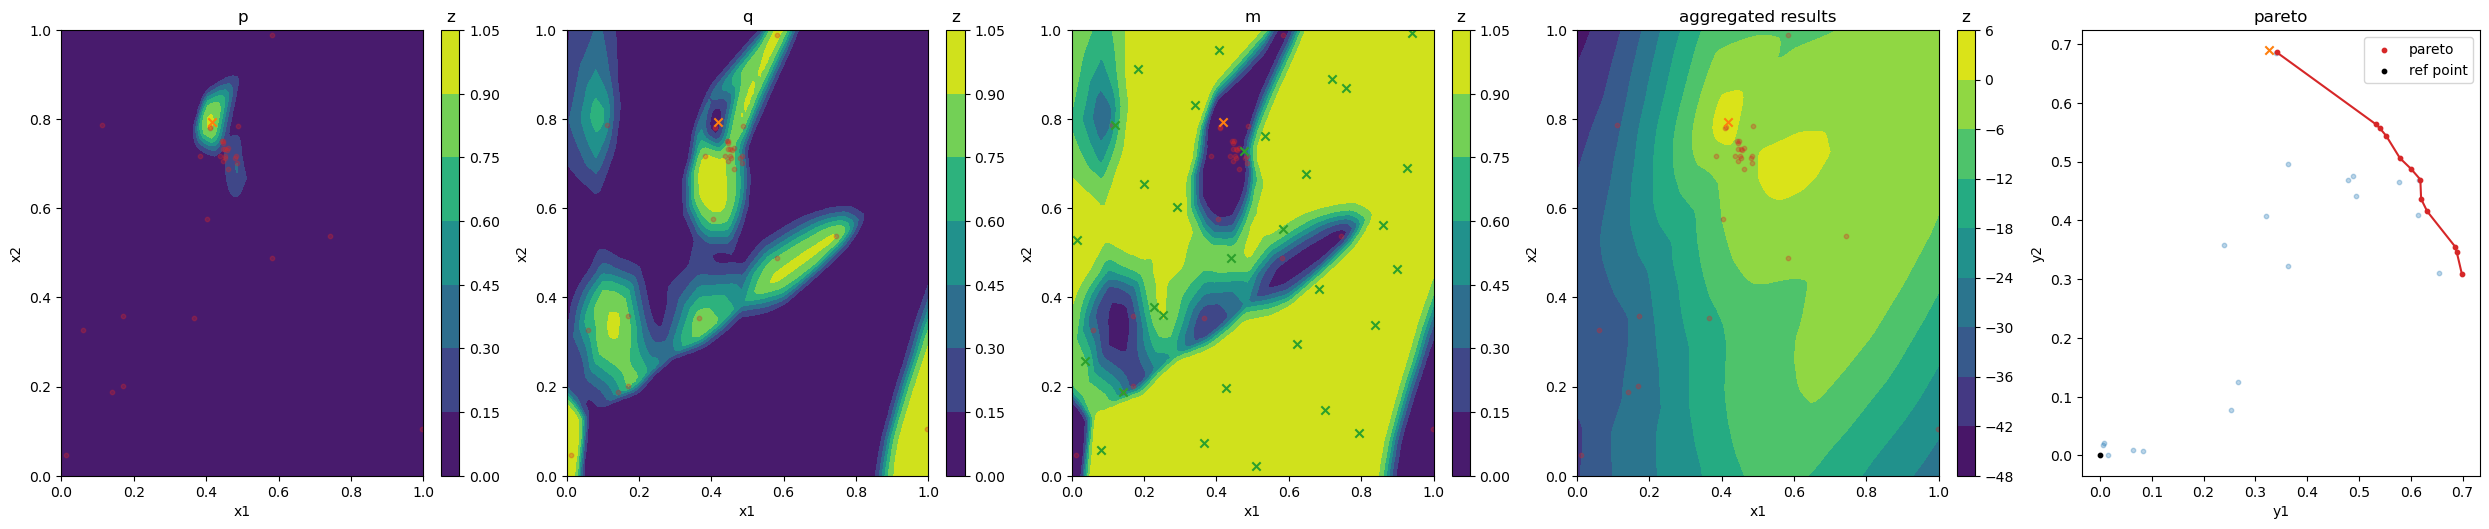

Iteration 26


2024-05-07 10:31:06,366 | Model fitting takes 0.86s
2024-05-07 10:31:06,368 | Optimizing the acquisition function takes 0.00s


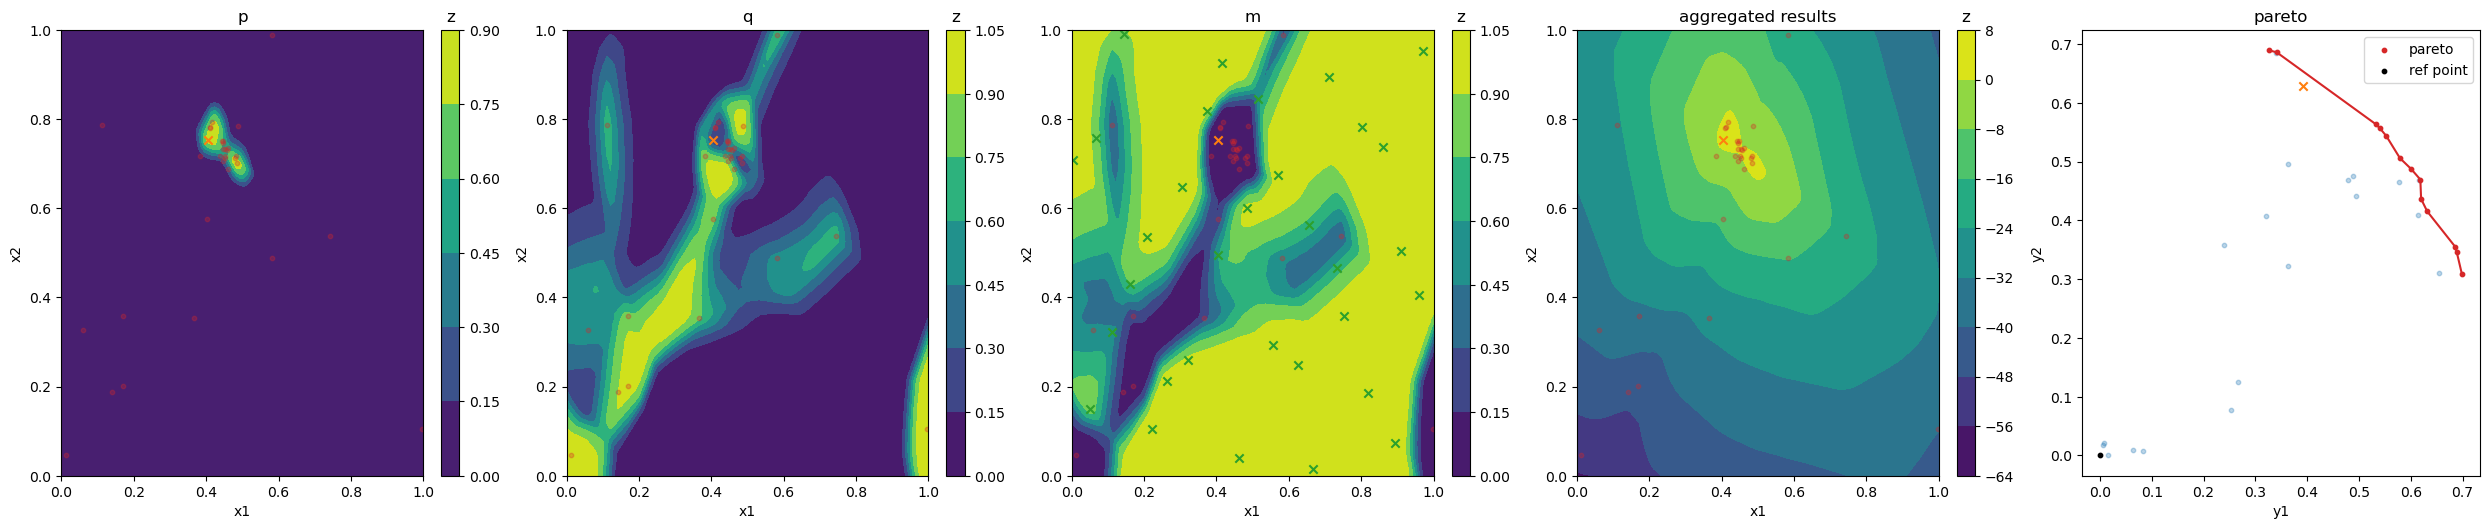

Iteration 27


2024-05-07 10:31:08,296 | Model fitting takes 0.88s
2024-05-07 10:31:08,299 | Optimizing the acquisition function takes 0.00s


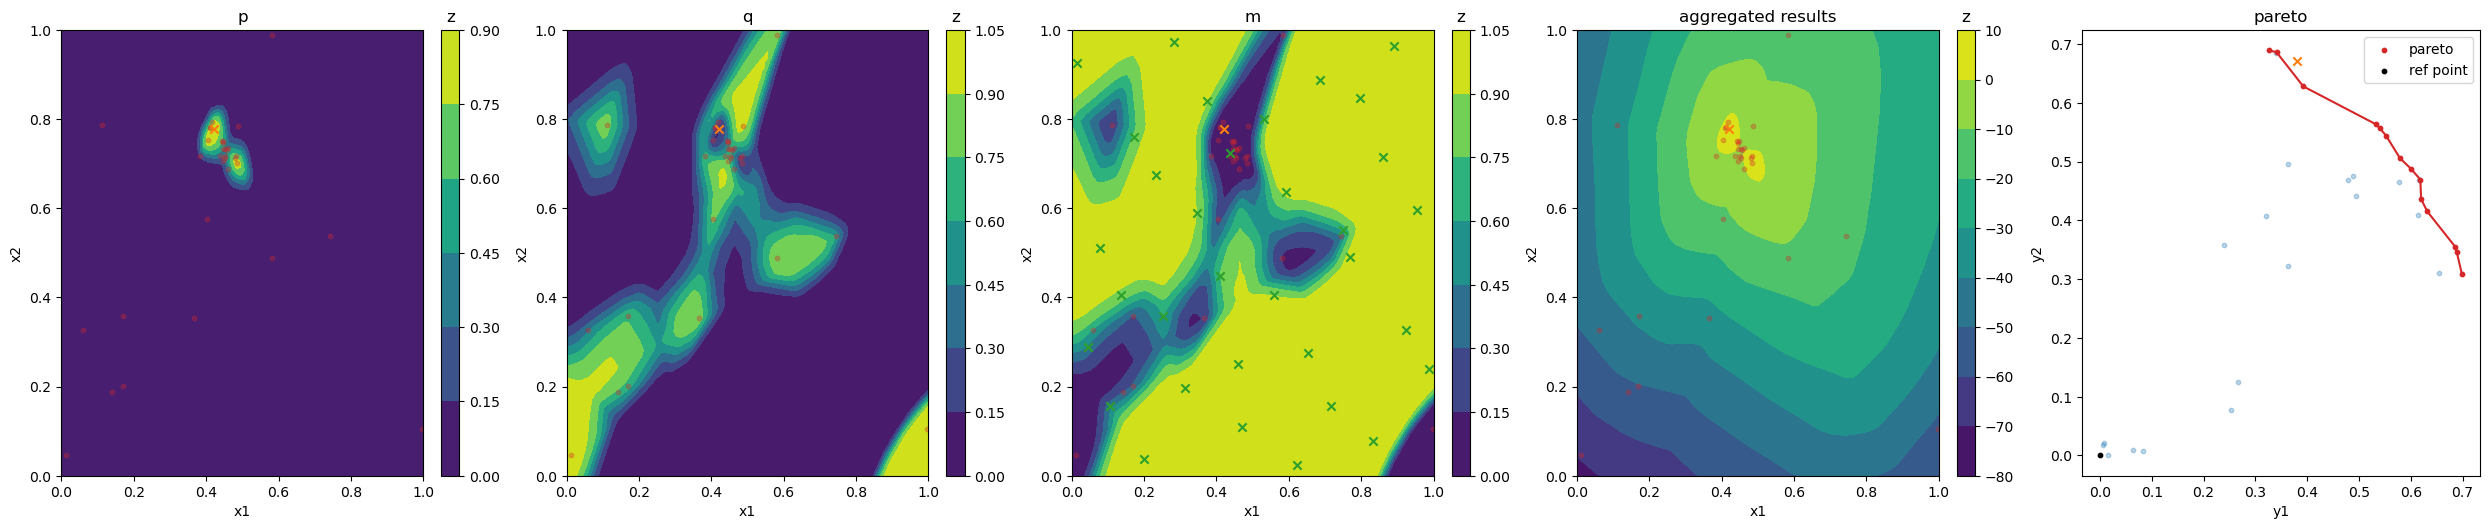

Iteration 28


2024-05-07 10:31:10,050 | Model fitting takes 0.89s
2024-05-07 10:31:10,053 | Optimizing the acquisition function takes 0.00s


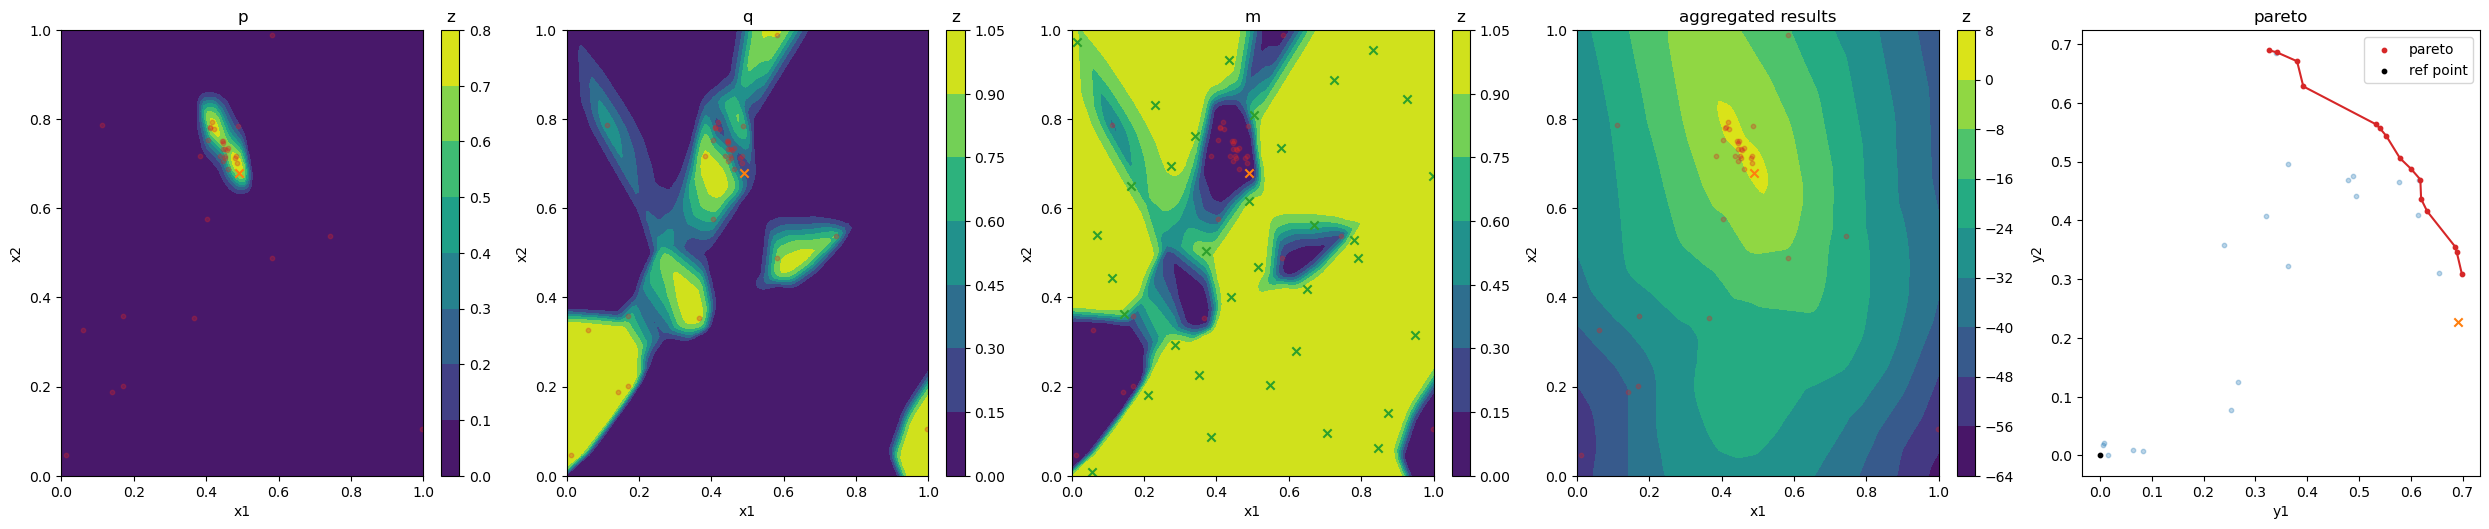

Iteration 29


2024-05-07 10:31:11,829 | Model fitting takes 0.89s
2024-05-07 10:31:11,831 | Optimizing the acquisition function takes 0.00s


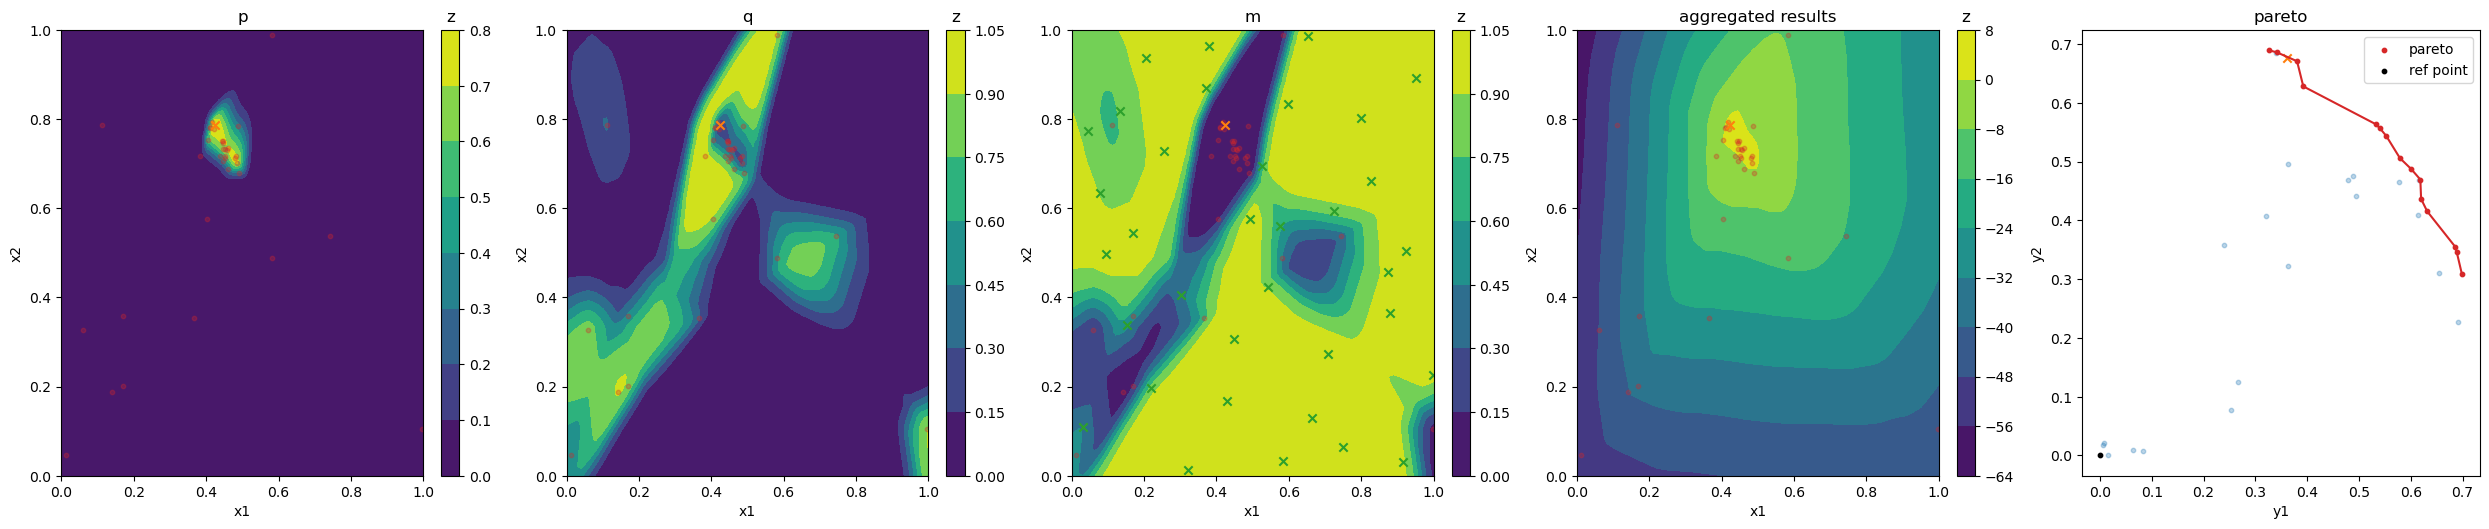

In [10]:
x_obs = init_x
y_obs = init_y

optimizer = MBORE_MDRE_EI(
    problem=problem,
    acq_type='ei'
)
gamma = 1/3
for n in range(30):
    print(f"Iteration {n}")

    pareto = is_non_dominated(y_obs)
    bd = DominatedPartitioning(ref_point=problem.ref_point, Y=y_obs)
    nbd = FastNondominatedPartitioning(ref_point=problem.ref_point, Y=y_obs)
    u, l = bd.hypercell_bounds
    u_nbd, _ = nbd.hypercell_bounds

    boxes = [Rectangle(
        l_point.cpu(),
        *(u_point - l_point).cpu(),
    ) for l_point, u_point in zip(l, u)]

    new_x = optimizer.observe_and_suggest(x_obs, y_obs, gamma=gamma)
    new_y = problem(new_x)

    preds_p = torch.empty(0, **tkwargs)
    preds_q = torch.empty(0, **tkwargs)
    preds_m = torch.empty(0, **tkwargs)
    preds = torch.empty(0, **tkwargs)

    with torch.no_grad():
        pred_logits = optimizer.clf(x_cands)
    acf_mdre = torch.nn.functional.softmax(pred_logits, dim=-1)
    dr_mdre = pred_logits[:, 0] - pred_logits[:, 1]
    preds = torch.cat([preds, dr_mdre])
    preds_p = torch.cat([preds_p, acf_mdre[:, 0]])
    preds_q = torch.cat([preds_q, acf_mdre[:, 1]])
    preds_m = torch.cat([preds_m, acf_mdre[:, 2]])

    # plot aggregated results
    fig = plt.figure(figsize=(25, 10))

    ax_p = plt.subplot2grid((2, 5), (0, 0))
    plot_input_space(xx, yy, x_obs, preds_p, fig, ax_p, title="p")
    ax_p.scatter(*new_x.t(), marker='x', color='tab:orange', label='candidates')
    ax_q = plt.subplot2grid((2, 5), (0, 1))
    plot_input_space(xx, yy, x_obs, preds_q, fig, ax_q, title="q")
    ax_q.scatter(*new_x.t(), marker='x', color='tab:orange', label='candidates')
    ax_m = plt.subplot2grid((2, 5), (0, 2))
    plot_input_space(xx, yy, x_obs, preds_m, fig, ax_m, title="m")
    ax_m.scatter(*new_x.t(), marker='x', color='tab:orange', label='candidates')
    ax_m.scatter(*optimizer.x_m.t(), marker='x', color='tab:green', label='candidates')

    ax_agg = plt.subplot2grid((2, 5), (0, 3))
    plot_input_space(xx, yy, x_obs, preds, fig, ax_agg, title="aggregated results")
    ax_agg.scatter(*new_x.t(), marker='x', color='tab:orange', label='candidates')

    ax_agg_p = plt.subplot2grid((2, 5), (0, 4))
    plot_pareto_space(y_obs, pareto, l, u_nbd, ax_agg_p, title='pareto')
    ax_agg_p.scatter(*new_y.t(), marker='x', color='tab:orange', label='candidates')

#     with torch.no_grad():
#         pred_logits = optimizer.auxi_clf(x_cands)
#     probs = torch.nn.functional.softmax(pred_logits, dim=-1)
#     ax_w = plt.subplot2grid((2, 5), (1, 0))
#     plot_input_space(xx, yy, x_obs, probs[:, 1], fig, ax_w, title="importance weights")

    plt.tight_layout()
    plt.show()
    x_obs = torch.cat([x_obs, new_x])
    y_obs = torch.cat([y_obs, new_y])